In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from ultimation import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
model_list = [LinearRegression(), KNeighborsRegressor(n_neighbors=3, n_jobs=10), KNeighborsRegressor(n_neighbors=5, n_jobs=10), KNeighborsRegressor(n_neighbors=7, n_jobs=10), MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, learning_rate_init=0.001, random_state=42), RandomForestRegressor(), XGBRegressor(n_estimators = 1000), XGBRegressor()]
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('train_boston latest.csv')
data

index          id      data   bedrooms   bathrooms   sqft_living  \
0       6243  8850000509   9/23/14          2        1.50          1620   
1       8986   191100410   6/20/14          3        2.75          2470   
2       9419  6632300040   4/25/15          2        1.00          1140   
3      10155  7517500310    5/6/15          3        1.00          1460   
4      10436  7454000990   9/24/14          2        1.00           670   
...      ...         ...       ...        ...         ...           ...   
17271  11964  4353700200   12/3/14          2        1.75          1810   
17272  21575  1931300412   4/16/15          3        2.25          1190   
17273   5390  9187200285    5/5/14          6        1.75          2920   
17274    860  2359300030    5/8/15          3        1.00           910   
17275  15795  7129304540  12/20/14          5        2.00          1430   

        sqft_lot   floors   waterfront   view  ...   sqft_above  \
0           1444      2.0            0      0  ...         1080   
1          10125      2.0            0      0  ...         2470   
2           7435      1.0            0      0  ...         1140   
3           6198      1.5            0      0  ...         1460   
4           6720      1.0            0      0  ...          670   
...          ...      ...          ...    ...  ...          ...   
17271       7523      1.0            0      0  ...         1170   
17272       1200      3.0            0      0  ...         1190   
17273       5000      2.5            0      0  ...         2780   
17274       5212      1.0            0      0  ...          910   
17275       5600      1.5            0      0  ...         1430   

        sqft_basement   yr_built   yr_renovated   zip_code      lat      lon  \
0                 540       2007              0      98144  47.5892 -122.309   
1                   0       1960           2012      98040  47.5651 -122.223   
2                   0       1952           1990      98125  47.7300 -122.310   
3                   0       1916              0      98107  47.6626 -122.361   
4                   0       1942              0      98126  47.5151 -122.372   
...               ...        ...            ...        ...      ...      ...   
17271             640       1962           1980      98027  47.5695 -122.087   
17272               0       2008              0      98103  47.6542 -122.346   
17273             140       1908              0      98122  47.6024 -122.295   
17274               0       1951              0      98115  47.6742 -122.284   
17275               0       1947              0      98118  47.5192 -122.266   

        sqft_living15   sqft_lot15   price  
0                1660         1642  525000  
1                2290        10125  970500  
2                1320         9385  327000  
3                2280         5160  775000  
4                 710         6720  304950  
...               ...          ...     ...  
17271            2090         7523  501000  
17272            1180         1224  475000  
17273            2020         5000  823000  
17274            1520         6300  565000  
17275            1860         5980  133000  

[17276 rows x 22 columns]

# EDA

### Part 1 : just looking at the standard things (shape, describe, dtypes, etc)

In [3]:
data.head()

index          id     data   bedrooms   bathrooms   sqft_living   sqft_lot  \
0   6243  8850000509  9/23/14          2        1.50          1620       1444   
1   8986   191100410  6/20/14          3        2.75          2470      10125   
2   9419  6632300040  4/25/15          2        1.00          1140       7435   
3  10155  7517500310   5/6/15          3        1.00          1460       6198   
4  10436  7454000990  9/24/14          2        1.00           670       6720   

    floors   waterfront   view  ...   sqft_above   sqft_basement   yr_built  \
0      2.0            0      0  ...         1080             540       2007   
1      2.0            0      0  ...         2470               0       1960   
2      1.0            0      0  ...         1140               0       1952   
3      1.5            0      0  ...         1460               0       1916   
4      1.0            0      0  ...          670               0       1942   

    yr_renovated   zip_code      lat      lon   sqft_living15   sqft_lot15  \
0              0      98144  47.5892 -122.309            1660         1642   
1           2012      98040  47.5651 -122.223            2290        10125   
2           1990      98125  47.7300 -122.310            1320         9385   
3              0      98107  47.6626 -122.361            2280         5160   
4              0      98126  47.5151 -122.372             710         6720   

    price  
0  525000  
1  970500  
2  327000  
3  775000  
4  304950  

[5 rows x 22 columns]

In [4]:
data.shape

(17276, 22)

In [5]:
data.columns.values

array(['index', ' id', ' data', ' bedrooms', ' bathrooms', ' sqft_living',
       ' sqft_lot', ' floors', ' waterfront', ' view', ' condition',
       ' grade', ' sqft_above', ' sqft_basement', ' yr_built',
       ' yr_renovated', ' zip_code', ' lat', ' lon', ' sqft_living15',
       ' sqft_lot15', ' price'], dtype=object)

In [6]:
# cleaning up the column names
data.columns = map(lambda x : x.strip(), data.columns)
data.columns

Index(['index', 'id', 'data', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [7]:
# creating a fist copy for later use
df = data.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17276 entries, 0 to 17275
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          17276 non-null  int64  
 1   id             17276 non-null  int64  
 2   data           17276 non-null  object 
 3   bedrooms       17276 non-null  int64  
 4   bathrooms      17276 non-null  float64
 5   sqft_living    17276 non-null  int64  
 6   sqft_lot       17276 non-null  int64  
 7   floors         17276 non-null  float64
 8   waterfront     17276 non-null  int64  
 9   view           17276 non-null  int64  
 10  condition      17276 non-null  int64  
 11  grade          17276 non-null  int64  
 12  sqft_above     17276 non-null  int64  
 13  sqft_basement  17276 non-null  int64  
 14  yr_built       17276 non-null  int64  
 15  yr_renovated   17276 non-null  int64  
 16  zip_code       17276 non-null  int64  
 17  lat            17276 non-null  float64
 18  lon   

In [9]:
data.describe()

index            id      bedrooms     bathrooms   sqft_living  \
count  17276.000000  1.727600e+04  17276.000000  17276.000000  17276.000000   
mean   10773.917921  4.581570e+09      3.380528      2.118011   2084.123177   
std     6241.518773  2.882571e+09      0.933642      0.768608    924.621058   
min        0.000000  1.000102e+06      1.000000      0.500000    370.000000   
25%     5380.750000  2.115720e+09      3.000000      1.750000   1420.000000   
50%    10770.500000  3.904961e+09      3.000000      2.250000   1920.000000   
75%    16179.500000  7.304301e+09      4.000000      2.500000   2556.250000   
max    21595.000000  9.900000e+09     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.727600e+04  17276.000000  17276.000000  17276.000000  17276.000000   
mean   1.508619e+04      1.497685      0.007641      0.233619      3.406518   
std    4.147208e+04      0.541526      0.087079      0.768524      0.648544   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.030000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.599000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069850e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

       ...    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  ...  17276.000000   17276.000000  17276.000000  17276.000000   
mean   ...   1791.053542     293.069634   1971.201783     83.881223   
std    ...    830.925292     445.900684     29.340613    400.517491   
min    ...    370.000000       0.000000   1900.000000      0.000000   
25%    ...   1190.000000       0.000000   1952.000000      0.000000   
50%    ...   1570.000000       0.000000   1975.000000      0.000000   
75%    ...   2220.000000     560.000000   1997.000000      0.000000   
max    ...   9410.000000    4820.000000   2015.000000   2015.000000   

           zip_code           lat           lon  sqft_living15     sqft_lot15  \
count  17276.000000  17276.000000  17276.000000   17276.000000   17276.000000   
mean   98078.075075     47.559617   -122.214537    1988.115825   12648.988307   
std       53.581267      0.138633      0.140474     687.864331   25805.732442   
min    98001.000000     47.155900   -122.519000     460.000000     651.000000   
25%    98033.000000     47.468275   -122.329000    1490.000000    5100.000000   
50%    98065.000000     47.571900   -122.230000    1840.000000    7614.000000   
75%    98118.000000     47.677400   -122.125000    2360.000000   10093.250000   
max    98199.000000     47.777600   -121.315000    6210.000000  560617.000000   

              price  
count  1.727600e+04  
mean   5.408807e+05  
std    3.732611e+05  
min    8.000000e+04  
25%    3.210202e+05  
50%    4.500000e+05  
75%    6.442125e+05  
max    7.700000e+06  

[8 rows x 21 columns]

In [10]:
data.price.unique()

array([525000, 970500, 327000, ..., 492650, 394250, 438600], dtype=int64)

In [11]:
data.price.value_counts()

350000     137
450000     135
325000     125
500000     118
425000     118
          ... 
292600       1
2570000      1
2850000      1
519995       1
303100       1
Name: price, Length: 3197, dtype: int64

In [12]:
prices = data['price']
# TODO: Minimum price of the data
minimum_price = np.min(prices)
# Alternative using pandas
# minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = np.max(prices)
# Alternative using pandas
# maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)
# Alternative using pandas
# mean_price = prices.mean()

# TODO: Median price of the data
median_price = np.median(prices)
# Alternative using pandas
# median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))
print("First quartile of prices: ${:,.2f}".format(first_quartile))
print("Second quartile of prices: ${:,.2f}".format(third_quartile))
print("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

Minimum price: $80,000.00
Maximum price: $7,700,000.00
Mean price: $540,880.74
Median price $450,000.00
Standard deviation of prices: $373,250.33
First quartile of prices: $321,020.25
Second quartile of prices: $644,212.50
Interquartile (IQR) of prices: $323,192.25


<AxesSubplot:>

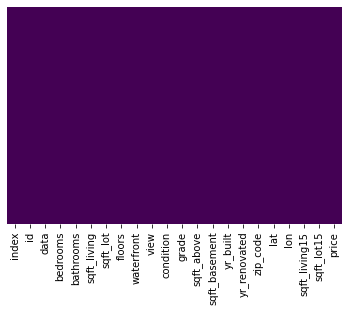

In [13]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')
# seems the data has no nulls

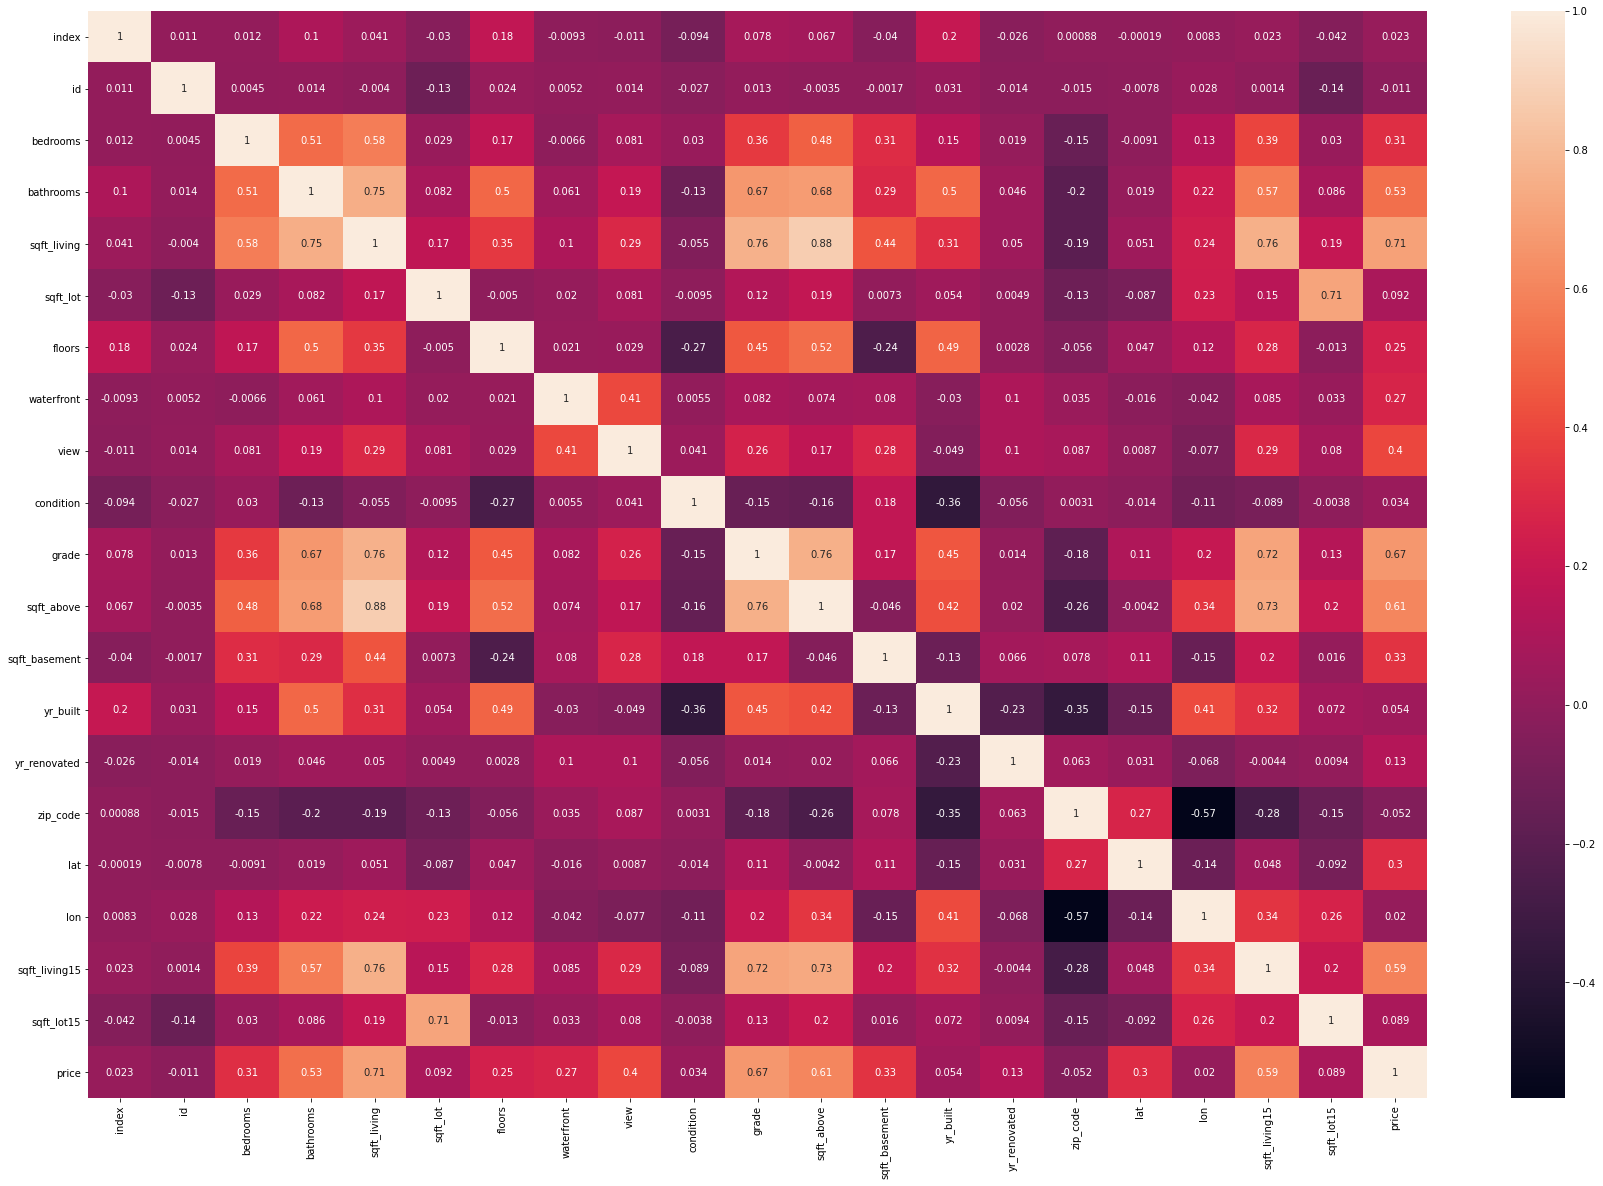

In [14]:
#heatmap for correlations
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [15]:
#checking correlations with the target column
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.705890
grade            0.668464
sqft_above       0.607706
sqft_living15    0.585543
bathrooms        0.525935
view             0.396544
sqft_basement    0.331291
bedrooms         0.310081
lat              0.302609
waterfront       0.267050
floors           0.252224
yr_renovated     0.128425
sqft_lot         0.092304
sqft_lot15       0.089045
yr_built         0.053602
condition        0.034459
index            0.023370
lon              0.020460
id              -0.010658
zip_code        -0.051657
Name: price, dtype: float64

# Running the wonder function from Felipe as a benchmark score

In [156]:
models = [LinearRegression(),
          MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, learning_rate_init=0.001, random_state=42),
          KNeighborsRegressor(n_neighbors=3, n_jobs=10),
          KNeighborsRegressor(n_neighbors=5, n_jobs=10),
          KNeighborsRegressor(n_neighbors=7, n_jobs=10), XGBRegressor()]

model_selection(data, models, 'price', allow_drop=False)

Sit back and let me do the boring and repetitive work for you...

Checking LinearRegression() model: 


Calculating interpolations. This might take a while.
-- Lost 0 rows dropping NaNs from categorical columns.

Interpolation replacement worked with higher R-squared: 0.6810337401551251.
Method used: "linear". 

Dealing with outliers on target variable...
With a 1.5 * IQR threshold, you lost 3% of data.

Data length after removing outliers and dealing with nulls: 16816 

Testing different scalers. This might take a while.
An error ocurred while scaling with PowerTransformer(method='box-cox').
An error ocurred while scaling with FunctionTransformer(func=<ufunc 'log1p'>, validate=True).
Almost there...
The scaler chosen was Normalizer(), with an r-squared of 0.6994190754736518.
Saving scaler to "final_scaler.pkl".

--------------

Checking MLPRegressor(random_state=42) model: 


Calculating interpolations. This might take a while.
Skipping interpolation... score bellow zero.
Interpolatio

### Turns out the benchmark is:
Initial  
R-square = 0.7419612905040613
MAE = 204831.53520456707
RMSE = 257673.06559433235

Adding XGBRegressor:
R-square = 0.8640783974130402
MAE = 497545.1557343371
RMSE = 648247.7607179177

Adding XGBRegressor & using data9:
METRICS:
R-square = 0.8519505910836813
MAE = 107425.92368929993
RMSE = 136791.6774094595

In [17]:
data1 = data.copy()
data1.head

<bound method NDFrame.head of        index          id      data  bedrooms  bathrooms  sqft_living  \
0       6243  8850000509   9/23/14         2       1.50         1620   
1       8986   191100410   6/20/14         3       2.75         2470   
2       9419  6632300040   4/25/15         2       1.00         1140   
3      10155  7517500310    5/6/15         3       1.00         1460   
4      10436  7454000990   9/24/14         2       1.00          670   
...      ...         ...       ...       ...        ...          ...   
17271  11964  4353700200   12/3/14         2       1.75         1810   
17272  21575  1931300412   4/16/15         3       2.25         1190   
17273   5390  9187200285    5/5/14         6       1.75         2920   
17274    860  2359300030    5/8/15         3       1.00          910   
17275  15795  7129304540  12/20/14         5       2.00         1430   

       sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0          1444     2.0     

In [18]:
# setting up the zip code column as categorical
data1['zip_code'] = data1['zip_code'].astype('category')

In [19]:
# extracting just the month from the data since it covers just one year
data1['data'] = pd.to_datetime(data1['data'])
data1['data'] = data1['data'].dt.month

In [20]:
data1['data'].dtypes

dtype('int64')

(array([ 807.,  986., 1509., 1775., 1928., 1772., 1757., 1545., 1408.,
        1490., 1135., 1164.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

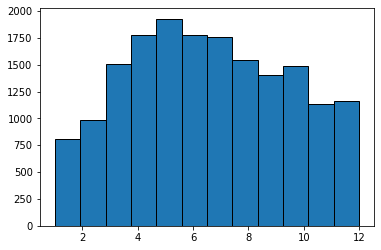

In [21]:
# turn out the best month for selling houses is May..
plt.hist(data1['data'], bins=12, edgecolor="k")

In [22]:
data1['yr_renovated'].value_counts()

0       16550
2014       74
2000       29
2013       29
2007       28
        ...  
1954        1
1951        1
1967        1
1962        1
1976        1
Name: yr_renovated, Length: 68, dtype: int64

In [23]:
#bucketing the years renovated in a new column
data1['was_renovated_or_not'] = data1['yr_renovated'].apply(lambda x: 1 if 0 < x < 2000 else 2 if x >= 2000 else 0)
data1['was_renovated_or_not'].value_counts()

0    16550
2      368
1      358
Name: was_renovated_or_not, dtype: int64

In [24]:
def funky_function(data, model_list):
    X = data.drop(['price'], axis=1)
    X = pd.get_dummies(X)
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    results = []
    for model in model_list:
        model.fit(X_train, y_train)
        results.append(model.score(X_test, y_test))
        print(model.fit(X_train, y_train), 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
    final_result = results.index(max(results))
    print("--------------------------------------------------------------------------------------------------------")
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print('R2 score:', max(results))
    print('Mean Absolute Error:', results2)
    print('Mean Squared Error:', results3)
    return model_list[final_result]
    

In [25]:
funky_function(data1, model_list)

LinearRegression() R2 score: 0.7680391409047059
Mean Absolute Error: 101896.79854189456
Mean Squared Error: 190909.60277939393
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3102173202694678
Mean Absolute Error: 164639.32764274694
Mean Squared Error: 329212.6861469744
KNeighborsRegressor(n_jobs=10) R2 score: 0.29442975885203615
Mean Absolute Error: 170043.02193287035
Mean Squared Error: 332958.83812174434
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.27346479633650145
Mean Absolute Error: 177069.57924107145
Mean Squared Error: 337869.31476010266
MLPRegressor(random_state=42) R2 score: -2.589635307727566
Mean Absolute Error: 634157.3131611571
Mean Squared Error: 751009.7648792805
RandomForestRegressor() R2 score: 0.8472711430629611
Mean Absolute Error: 74927.29688078703
Mean Squared Error: 154910.54092680724
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             impo

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Best score is XGBRegressor, going by the MAE metric
R2 score: 0.8812596976641301
Mean Absolute Error: 70700.39450412327
Mean Squared Error: 136590.18553328508

In [26]:
data2 = data1.copy()

In [27]:
len(data2['index'].unique()), len(data2['id'].unique()), len(data2['index'].unique()) - len(data2['id'].unique())

(17276, 17157, 119)

In [28]:
#seems some houses have been sold more than once
#droping the index
data2 = data2.set_index('index', drop = True)
data2.head()

id  data  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
index                                                                         
6243   8850000509     9         2       1.50         1620      1444     2.0   
8986    191100410     6         3       2.75         2470     10125     2.0   
9419   6632300040     4         2       1.00         1140      7435     1.0   
10155  7517500310     5         3       1.00         1460      6198     1.5   
10436  7454000990     9         2       1.00          670      6720     1.0   

       waterfront  view  condition  ...  sqft_basement  yr_built  \
index                               ...                            
6243            0     0          3  ...            540      2007   
8986            0     0          3  ...              0      1960   
9419            0     0          3  ...              0      1952   
10155           0     0          4  ...              0      1916   
10436           0     0          5  ...              0      1942   

       yr_renovated  zip_code      lat      lon  sqft_living15  sqft_lot15  \
index                                                                        
6243              0     98144  47.5892 -122.309           1660        1642   
8986           2012     98040  47.5651 -122.223           2290       10125   
9419           1990     98125  47.7300 -122.310           1320        9385   
10155             0     98107  47.6626 -122.361           2280        5160   
10436             0     98126  47.5151 -122.372            710        6720   

        price  was_renovated_or_not  
index                                
6243   525000                     0  
8986   970500                     2  
9419   327000                     1  
10155  775000                     0  
10436  304950                     0  

[5 rows x 22 columns]

In [29]:
data2.columns

Index(['id', 'data', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code', 'lat', 'lon',
       'sqft_living15', 'sqft_lot15', 'price', 'was_renovated_or_not'],
      dtype='object')

In [30]:
data2.dtypes

id                         int64
data                       int64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zip_code                category
lat                      float64
lon                      float64
sqft_living15              int64
sqft_lot15                 int64
price                      int64
was_renovated_or_not       int64
dtype: object

In [31]:
data2['bathrooms'] = data2['bathrooms'].astype('category')
data2['bedrooms'] = data2['bedrooms'].astype('category')
data2['floors'] = data2['floors'].astype('category')
data2['view'] = data2['view'].astype('category')
data2['condition'] = data2['condition'].astype('category')
data2['grade'] = data2['grade'].astype('category')

In [32]:
data2.dtypes

id                         int64
data                       int64
bedrooms                category
bathrooms               category
sqft_living                int64
sqft_lot                   int64
floors                  category
waterfront                 int64
view                    category
condition               category
grade                   category
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zip_code                category
lat                      float64
lon                      float64
sqft_living15              int64
sqft_lot15                 int64
price                      int64
was_renovated_or_not       int64
dtype: object

In [33]:
funky_function(data2, model_list)

LinearRegression() R2 score: 0.7843565449692409
Mean Absolute Error: 93293.62899509651
Mean Squared Error: 184072.3515290871
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3287925230997618
Mean Absolute Error: 158865.94830246916
Mean Squared Error: 324749.7403987857
KNeighborsRegressor(n_jobs=10) R2 score: 0.3074412312091457
Mean Absolute Error: 166766.72158564816
Mean Squared Error: 329874.4931683402
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.28143681647502583
Mean Absolute Error: 174668.88157242065
Mean Squared Error: 336010.5400585112
MLPRegressor(random_state=42) R2 score: -1.2336879578305022
Mean Absolute Error: 445701.36106076575
Mean Squared Error: 592422.6727783948
RandomForestRegressor() R2 score: 0.8373361485625128
Mean Absolute Error: 75534.24435185186
Mean Squared Error: 159869.62094691355
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importa

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
data2['bathrooms'] = data2['bathrooms'].astype('object')
data2['bedrooms'] = data2['bedrooms'].astype('object')
data2['floors'] = data2['floors'].astype('object')
data2['view'] = data2['view'].astype('object')
data2['condition'] = data2['condition'].astype('object')
data2['grade'] = data2['grade'].astype('object')

In [35]:
funky_function(data2, model_list)

LinearRegression() R2 score: 0.7843565449692409
Mean Absolute Error: 93293.62899509651
Mean Squared Error: 184072.3515290871
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3287925230997618
Mean Absolute Error: 158865.94830246916
Mean Squared Error: 324749.7403987857
KNeighborsRegressor(n_jobs=10) R2 score: 0.3074412312091457
Mean Absolute Error: 166766.72158564816
Mean Squared Error: 329874.4931683402
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.28143681647502583
Mean Absolute Error: 174668.88157242065
Mean Squared Error: 336010.5400585112
MLPRegressor(random_state=42) R2 score: -1.2336879578305022
Mean Absolute Error: 445701.36106076575
Mean Squared Error: 592422.6727783948
RandomForestRegressor() R2 score: 0.8372437184940729
Mean Absolute Error: 75880.83240162036
Mean Squared Error: 159915.0356513208
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importan

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Setting bedrooms, bathrooms, floors, view, condition and grade to either object or category does not change the result
#### In the same time, using the columns as object/category decreases the score a bit

R2 score: 0.8738598392691885
Mean Absolute Error: 70684.74422652634
Mean Squared Error: 140781.9932289654

### Further tweaking

In [36]:
data.bedrooms.unique()

array([ 2,  3,  5,  4,  6,  1,  7,  9,  8, 10, 11, 33], dtype=int64)

In [37]:
bath = list(data.bathrooms.unique())
bath.sort()
bath

[0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 2.0,
 2.25,
 2.5,
 2.75,
 3.0,
 3.25,
 3.5,
 3.75,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 5.75,
 6.0,
 6.25,
 6.5,
 6.75,
 7.5,
 7.75,
 8.0]

In [38]:
floors = data.floors.unique()
floors.sort()
floors

array([1. , 1.5, 2. , 2.5, 3. , 3.5])

In [39]:
data3 = data1.copy()
data3['basement'] = data3['sqft_basement'].apply(lambda x: 1 if 0 < x else 0)
data3['basement'].value_counts()

0    10482
1     6794
Name: basement, dtype: int64

In [40]:
data3['bathrooms'] = data3['bathrooms'].apply(lambda x: 1 if x < 1.75 else 2 if 1.75 <= x < 2.75 else 3 if 2.75 <= x < 3.75 else 4 if 3.75 <= x < 4.75 else 5 if 4.75 <= x < 5.75 else 5 if 5.75 <= x < 6.75 else 7 if 6.75 <= x < 7.75 else 8)

In [41]:
data3['floors'] = data3['floors'].apply(lambda x: 1 if x < 2 else 2 if 2 <= x < 3 else 3)

In [42]:
funky_function(data3, model_list)

LinearRegression() R2 score: 0.7687655605308721
Mean Absolute Error: 102077.84871856721
Mean Squared Error: 190610.43759316445
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3102173202694678
Mean Absolute Error: 164639.32764274694
Mean Squared Error: 329212.6861469744
KNeighborsRegressor(n_jobs=10) R2 score: 0.29442975885203615
Mean Absolute Error: 170043.02193287035
Mean Squared Error: 332958.83812174434
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.27346479633650145
Mean Absolute Error: 177069.57924107145
Mean Squared Error: 337869.31476010266
MLPRegressor(random_state=42) R2 score: -1.4117492100322986
Mean Absolute Error: 475250.76153013535
Mean Squared Error: 615582.821984645
RandomForestRegressor() R2 score: 0.8459503306574845
Mean Absolute Error: 74418.56917534722
Mean Squared Error: 155578.93884584037
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             imp

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Bucketing the bathrooms and floors helps improve the model over the categorical/object approach, but not by much
#### It also slightly decreases the first score (without bucketing)

R2 score: 0.8757862555469562
Mean Absolute Error: 71401.82666467737
Mean Squared Error: 139702.84378707266

In [43]:
data3['bathrooms'] = data3['bathrooms'].astype('object')
data3['floors'] = data3['floors'].astype('object')

In [44]:
funky_function(data3, model_list)

LinearRegression() R2 score: 0.7899666329330679
Mean Absolute Error: 98555.45979727003
Mean Squared Error: 181662.19904171096
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3102173202694678
Mean Absolute Error: 164639.32764274694
Mean Squared Error: 329212.6861469744
KNeighborsRegressor(n_jobs=10) R2 score: 0.29442975885203615
Mean Absolute Error: 170043.02193287035
Mean Squared Error: 332958.83812174434
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.27346479633650145
Mean Absolute Error: 177069.57924107145
Mean Squared Error: 337869.31476010266
MLPRegressor(random_state=42) R2 score: -0.8872070230697526
Mean Absolute Error: 373597.2569665094
Mean Squared Error: 544540.5075141699
RandomForestRegressor() R2 score: 0.8525015379716929
Mean Absolute Error: 74132.85826099536
Mean Squared Error: 152234.87876724894
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             impo

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Setting floors and bathrooms as categorical gives even worse results..
R2 score: 0.8696715517282525
Mean Absolute Error: 71475.34531430845
Mean Squared Error: 143100.1312107441


In [45]:
data4 = data1.copy()
data4['basement'] = data4['sqft_basement'].apply(lambda x: 1 if 0 < x else 0)
data4['basement'].value_counts()

0    10482
1     6794
Name: basement, dtype: int64

In [46]:
data4.columns

Index(['index', 'id', 'data', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price',
       'was_renovated_or_not', 'basement'],
      dtype='object')

In [47]:
funky_function(data4, model_list)

LinearRegression() R2 score: 0.7687564162455388
Mean Absolute Error: 101893.56239095813
Mean Squared Error: 190614.2064500036
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3102173202694678
Mean Absolute Error: 164639.32764274694
Mean Squared Error: 329212.6861469744
KNeighborsRegressor(n_jobs=10) R2 score: 0.29442975885203615
Mean Absolute Error: 170043.02193287035
Mean Squared Error: 332958.83812174434
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.27346479633650145
Mean Absolute Error: 177069.57924107145
Mean Squared Error: 337869.31476010266
MLPRegressor(random_state=42) R2 score: -1.411748495244558
Mean Absolute Error: 475250.6703897341
Mean Squared Error: 615582.7307622482
RandomForestRegressor() R2 score: 0.8490448306686269
Mean Absolute Error: 74565.21168981482
Mean Squared Error: 154008.40198365506
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             impor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Just adding the column with the bucketed basement gives the same results as in the best try
R2 score: 0.8812596976641301
Mean Absolute Error: 70700.39450412327
Mean Squared Error: 136590.18553328508

### Removing outliers

In [48]:
data4.columns

Index(['index', 'id', 'data', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price',
       'was_renovated_or_not', 'basement'],
      dtype='object')

In [49]:
data4.dtypes

index                      int64
id                         int64
data                       int64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zip_code                category
lat                      float64
lon                      float64
sqft_living15              int64
sqft_lot15                 int64
price                      int64
was_renovated_or_not       int64
basement                   int64
dtype: object

In [50]:
def remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    
    if len(in_columns) == 0:
        in_columns = df.select_dtypes(np.number).columns
        
    for column in in_columns:
        if column not in skip_columns:
            print(column)
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            print(upper_limit, lower_limit)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
            print(len(df))
    return df

In [51]:
data4wo = remove_outliers(data4, threshold=1.5, in_columns=['bedrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'], skip_columns=['index', 'id', 'data', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'zip_code', 'lat', 'lon', 'was_renovated_or_not', 'basement'])

bedrooms
5.5 1.5
16857
sqft_living
4205.0 -235.0
16419
sqft_lot
18375.0 -3025.0
14647
sqft_above
3377.5 -170.5
14311
sqft_basement
1325.0 -795.0
14053
sqft_living15
3265.0 345.0
13833
sqft_lot15
14795.0 -1197.0
13485
price
980000.0 -100000.0
13053


In [52]:
funky_function(data4wo, model_list)

LinearRegression() R2 score: 0.8067589595393703
Mean Absolute Error: 56553.54998245363
Mean Squared Error: 77564.72759267631
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.36675203883498275
Mean Absolute Error: 99625.17911400486
Mean Squared Error: 140411.1150049907
KNeighborsRegressor(n_jobs=10) R2 score: 0.3562249174538049
Mean Absolute Error: 102607.72485637688
Mean Squared Error: 141573.40243981185
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.3342466929987139
Mean Absolute Error: 106080.44121026427
Mean Squared Error: 143969.7512213625
MLPRegressor(random_state=42) R2 score: -1.7877450877586685
Mean Absolute Error: 235566.7919315554
Mean Squared Error: 294605.6812370791
RandomForestRegressor() R2 score: 0.829683241431956
Mean Absolute Error: 50400.605266181534
Mean Squared Error: 72818.7600522624
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Removing outliers in the 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price' decreases  the R2 score but highly increases the MAE & MSE! 

R2 score: 0.8456156780926867
Mean Absolute Error: 48097.69332870548
Mean Squared Error: 69329.199435722

In [53]:
data4wo['bathrooms'] = data4wo['bathrooms'].astype('category')
data4wo['bedrooms'] = data4wo['bedrooms'].astype('category')
data4wo['floors'] = data4wo['floors'].astype('category')
data4wo['view'] = data4wo['view'].astype('category')
data4wo['condition'] = data4wo['condition'].astype('category')
data4wo['grade'] = data4wo['grade'].astype('category')

In [54]:
funky_function(data4wo, model_list)

LinearRegression() R2 score: 0.8066761823300745
Mean Absolute Error: 56221.16198669565
Mean Squared Error: 77581.33872309845
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.36675203883498275
Mean Absolute Error: 99625.17911400486
Mean Squared Error: 140411.1150049907
KNeighborsRegressor(n_jobs=10) R2 score: 0.3562249174538049
Mean Absolute Error: 102607.72485637688
Mean Squared Error: 141573.40243981185
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.3342466929987139
Mean Absolute Error: 106080.44121026427
Mean Squared Error: 143969.7512213625
MLPRegressor(random_state=42) R2 score: -1.5078081820078153
Mean Absolute Error: 226554.99964152576
Mean Squared Error: 279422.7390295325
RandomForestRegressor() R2 score: 0.8261139778073782
Mean Absolute Error: 50789.532631175796
Mean Squared Error: 73577.82138130757
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importa

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### 

#### Turning columns to categoricals again decreases slightly the metrics

R2 score: 0.8418555805069622
Mean Absolute Error: 48249.378396088665
Mean Squared Error: 70168.39191558603

In [55]:
data5 = data4wo.copy()
numericals = data5.select_dtypes(np.number).drop(columns=['price'], axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_numericals = add_constant(numericals)
vif_numericals

const  index          id  data  sqft_living  sqft_lot  waterfront  \
0        1.0   6243  8850000509     9         1620      1444           0   
1        1.0   8986   191100410     6         2470     10125           0   
2        1.0   9419  6632300040     4         1140      7435           0   
3        1.0  10155  7517500310     5         1460      6198           0   
4        1.0  10436  7454000990     9          670      6720           0   
...      ...    ...         ...   ...          ...       ...         ...   
17270    1.0  11284  7682200340     7         1960      8875           0   
17271    1.0  11964  4353700200    12         1810      7523           0   
17272    1.0  21575  1931300412     4         1190      1200           0   
17274    1.0    860  2359300030     5          910      5212           0   
17275    1.0  15795  7129304540    12         1430      5600           0   

       sqft_above  sqft_basement  yr_built  yr_renovated      lat      lon  \
0            1080            540      2007             0  47.5892 -122.309   
1            2470              0      1960          2012  47.5651 -122.223   
2            1140              0      1952          1990  47.7300 -122.310   
3            1460              0      1916             0  47.6626 -122.361   
4             670              0      1942             0  47.5151 -122.372   
...           ...            ...       ...           ...      ...      ...   
17270        1290            670      1965             0  47.3344 -122.301   
17271        1170            640      1962          1980  47.5695 -122.087   
17272        1190              0      2008             0  47.6542 -122.346   
17274         910              0      1951             0  47.6742 -122.284   
17275        1430              0      1947             0  47.5192 -122.266   

       sqft_living15  sqft_lot15  was_renovated_or_not  basement  
0               1660        1642                     0         1  
1               2290       10125                     2         0  
2               1320        9385                     1         0  
3               2280        5160                     0         0  
4                710        6720                     0         0  
...              ...         ...                   ...       ...  
17270           1890        8700                     0         1  
17271           2090        7523                     1         1  
17272           1180        1224                     0         0  
17274           1520        6300                     0         0  
17275           1860        5980                     0         0  

[13053 rows x 17 columns]

In [56]:
threshold = 10

while True:
    # calculates the vif
    values = [variance_inflation_factor(np.array(vif_numericals), i)
              for i in range(len(vif_numericals.columns))][1:]
    display(pd.DataFrame(values, index=vif_numericals.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif_numericals.columns[col_index]
        # drops that column
        vif_numericals = vif_numericals.drop(column_name, axis=1)
    else:
        break

vif_numericals

0
data                   1.001902
waterfront             1.007786
id                     1.017228
index                  1.077861
lat                    1.102686
lon                    1.459004
yr_built               1.662336
sqft_living15          2.330481
basement               4.210809
sqft_lot15             4.355425
sqft_lot               4.373026
was_renovated_or_not  10.511324
yr_renovated          10.595923
sqft_living                 inf
sqft_above                  inf
sqft_basement               inf

0
data                   1.001902
waterfront             1.007786
id                     1.017228
index                  1.077861
lat                    1.102686
lon                    1.459004
yr_built               1.662336
sqft_living15          2.330481
sqft_above             2.605831
sqft_basement          4.098343
basement               4.210809
sqft_lot15             4.355425
sqft_lot               4.373026
was_renovated_or_not  10.511324
yr_renovated          10.595923

0
data                  1.001682
waterfront            1.005750
id                    1.017225
was_renovated_or_not  1.058798
index                 1.077525
lat                   1.102654
lon                   1.459004
yr_built              1.647430
sqft_living15         2.330480
sqft_above            2.603127
sqft_basement         4.094496
basement              4.209869
sqft_lot15            4.354632
sqft_lot              4.372838

const  index          id  data  sqft_lot  waterfront  sqft_above  \
0        1.0   6243  8850000509     9      1444           0        1080   
1        1.0   8986   191100410     6     10125           0        2470   
2        1.0   9419  6632300040     4      7435           0        1140   
3        1.0  10155  7517500310     5      6198           0        1460   
4        1.0  10436  7454000990     9      6720           0         670   
...      ...    ...         ...   ...       ...         ...         ...   
17270    1.0  11284  7682200340     7      8875           0        1290   
17271    1.0  11964  4353700200    12      7523           0        1170   
17272    1.0  21575  1931300412     4      1200           0        1190   
17274    1.0    860  2359300030     5      5212           0         910   
17275    1.0  15795  7129304540    12      5600           0        1430   

       sqft_basement  yr_built      lat      lon  sqft_living15  sqft_lot15  \
0                540      2007  47.5892 -122.309           1660        1642   
1                  0      1960  47.5651 -122.223           2290       10125   
2                  0      1952  47.7300 -122.310           1320        9385   
3                  0      1916  47.6626 -122.361           2280        5160   
4                  0      1942  47.5151 -122.372            710        6720   
...              ...       ...      ...      ...            ...         ...   
17270            670      1965  47.3344 -122.301           1890        8700   
17271            640      1962  47.5695 -122.087           2090        7523   
17272              0      2008  47.6542 -122.346           1180        1224   
17274              0      1951  47.6742 -122.284           1520        6300   
17275              0      1947  47.5192 -122.266           1860        5980   

       was_renovated_or_not  basement  
0                         0         1  
1                         2         0  
2                         1         0  
3                         0         0  
4                         0         0  
...                     ...       ...  
17270                     0         1  
17271                     1         1  
17272                     0         0  
17274                     0         0  
17275                     0         0  

[13053 rows x 15 columns]

In [57]:
vif_numericals.columns

Index(['const', 'index', 'id', 'data', 'sqft_lot', 'waterfront', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'lon', 'sqft_living15',
       'sqft_lot15', 'was_renovated_or_not', 'basement'],
      dtype='object')

In [58]:
data6 = data5[['index', 'id', 'data', 'sqft_lot', 'waterfront', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'lon', 'sqft_living15',
       'sqft_lot15', 'was_renovated_or_not', 'basement', 'price']]

In [59]:
funky_function(data6, model_list)

LinearRegression() R2 score: 0.5625909211114619
Mean Absolute Error: 88951.4251552099
Mean Squared Error: 116696.6756735452
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3609473999304802
Mean Absolute Error: 100073.05668326312
Mean Squared Error: 141053.1830691224
KNeighborsRegressor(n_jobs=10) R2 score: 0.3541139379693833
Mean Absolute Error: 102694.0744542321
Mean Squared Error: 141805.3265721591
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.33381809393485296
Mean Absolute Error: 106078.5234994802
Mean Squared Error: 144016.08623162497
MLPRegressor(random_state=42) R2 score: -1.5117433464701708
Mean Absolute Error: 224619.03827127366
Mean Squared Error: 279641.8832657625
RandomForestRegressor() R2 score: 0.8165658016518682
Mean Absolute Error: 52189.438035235544
Mean Squared Error: 75570.92551495429
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importanc

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Using VIF gives a decent result but worse than the version with outliers removed. Also worse than the original result

R2 score: 0.8225175695829247
Mean Absolute Error: 52157.24933125479
Mean Squared Error: 74334.81614750344

In [60]:
data_zipcode = data4wo[['zip_code']]


In [61]:
data7 = pd.concat([data6, data_zipcode], axis = 1)

In [62]:
data7 = data7.dropna()

In [63]:
data7.shape

(13053, 16)

In [64]:
funky_function(data7, model_list)

LinearRegression() R2 score: 0.7801204410978113
Mean Absolute Error: 60731.4152117359
Mean Squared Error: 82738.3806252831
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.3609583265441144
Mean Absolute Error: 100068.58840801736
Mean Squared Error: 141051.97719012183
KNeighborsRegressor(n_jobs=10) R2 score: 0.3542580097369331
Mean Absolute Error: 102684.3291459211
Mean Squared Error: 141789.5100956428
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.3338177763510114
Mean Absolute Error: 106079.12534879903
Mean Squared Error: 144016.12055946852
MLPRegressor(random_state=42) R2 score: -1.5263579181993494
Mean Absolute Error: 226373.45556157155
Mean Squared Error: 280454.2510527568
RandomForestRegressor() R2 score: 0.8183057622824794
Mean Absolute Error: 52019.68441976255
Mean Squared Error: 75211.65844151944
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Adding zip_code we get decent MAE & MSE but not the best R2

R2 score: 0.817026405801419
Mean Absolute Error: 51411.88632762991
Mean Squared Error: 73361.62446243317

In [65]:
data4wo.zip_code.unique()

[98144, 98040, 98125, 98107, 98126, ..., 98004, 98005, 98024, 98070, 98039]
Length: 70
Categories (70, int64): [98144, 98040, 98125, 98107, ..., 98005, 98024, 98070, 98039]

In [66]:
data4wo.dtypes

index                      int64
id                         int64
data                       int64
bedrooms                category
bathrooms               category
sqft_living                int64
sqft_lot                   int64
floors                  category
waterfront                 int64
view                    category
condition               category
grade                   category
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zip_code                category
lat                      float64
lon                      float64
sqft_living15              int64
sqft_lot15                 int64
price                      int64
was_renovated_or_not       int64
basement                   int64
dtype: object

In [67]:
data8 = remove_outliers(data4, threshold=1.5, in_columns=['bedrooms', 'sqft_living',
       'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'], skip_columns=['index', 'id', 'data', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'zip_code', 'lat', 'lon', 'was_renovated_or_not', 'basement'])

bedrooms
5.5 1.5
16857
sqft_living
4205.0 -235.0
16419
sqft_lot
18375.0 -3025.0
14647
sqft_above
3377.5 -170.5
14311
sqft_basement
1325.0 -795.0
14053
sqft_living15
3265.0 345.0
13833
sqft_lot15
14795.0 -1197.0
13485
price
980000.0 -100000.0
13053


In [68]:
data8.dtypes

index                      int64
id                         int64
data                       int64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zip_code                category
lat                      float64
lon                      float64
sqft_living15              int64
sqft_lot15                 int64
price                      int64
was_renovated_or_not       int64
basement                   int64
dtype: object

In [69]:
#data8['zip_code'] = data8['zip_code'].astype(int)

In [70]:
data8.dtypes

index                      int64
id                         int64
data                       int64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zip_code                category
lat                      float64
lon                      float64
sqft_living15              int64
sqft_lot15                 int64
price                      int64
was_renovated_or_not       int64
basement                   int64
dtype: object

### Trying to run Recursive Feature Elimination here but 10 hours later it crashed my Python 3 times..

In [71]:
%matplotlib inline

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [72]:
correlated_features = set()
correlation_matrix = data8.drop('price', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [73]:
correlated_features

{'basement', 'sqft_above', 'sqft_lot15', 'was_renovated_or_not'}

X = data8.drop('price', axis=1)
target = data8['price']

rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

print('Optimal number of features: {}'.format(rfecv.n_features_))

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [74]:
### Further exploring the data

models = [LinearRegression(), MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, learning_rate_init=0.001, random_state=42), KNeighborsRegressor(n_neighbors=3, n_jobs=10), KNeighborsRegressor(n_neighbors=5, n_jobs=10), KNeighborsRegressor(n_neighbors=7, n_jobs=10), XGBRegressor(), XGBRegressor(n_estimators=1000)]

model_selection(data9, models, 'price', allow_drop=False)

In [128]:
data9 = data4wo.copy()

In [129]:
data9.describe()

index            id          data   sqft_living      sqft_lot  \
count  13053.000000  1.305300e+04  13053.000000  13053.000000  13053.000000   
mean   10838.417988  4.758437e+09      6.562093   1811.535356   6887.668429   
std     6261.958156  2.876632e+09      3.131246    611.795527   3233.220043   
min        0.000000  3.600057e+06      1.000000    520.000000    520.000000   
25%     5464.000000  2.313900e+09      4.000000   1340.000000   4673.000000   
50%    10825.000000  4.077800e+09      6.000000   1740.000000   6927.000000   
75%    16261.000000  7.517501e+09      9.000000   2220.000000   8814.000000   
max    21595.000000  9.900000e+09     12.000000   4170.000000  18360.000000   

         waterfront    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  13053.000000  13053.000000   13053.000000  13053.000000  13053.000000   
mean       0.001149   1573.133379     238.401977   1969.968130     66.057994   
std        0.033881    589.014010     356.179656     29.906726    357.077773   
min        0.000000    480.000000       0.000000   1900.000000      0.000000   
25%        0.000000   1130.000000       0.000000   1950.000000      0.000000   
50%        0.000000   1430.000000       0.000000   1971.000000      0.000000   
75%        0.000000   1900.000000     480.000000   1997.000000      0.000000   
max        1.000000   3370.000000    1320.000000   2015.000000   2015.000000   

                lat           lon  sqft_living15    sqft_lot15          price  \
count  13053.000000  13053.000000   13053.000000  13053.000000   13053.000000   
mean      47.558250   -122.232025    1794.138129   6769.091473  442218.124876   
std        0.139933      0.130580     500.652748   2834.712705  179394.730536   
min       47.155900   -122.475000     620.000000    651.000000   81000.000000   
25%       47.463100   -122.339000    1420.000000   4800.000000  300500.000000   
50%       47.567700   -122.272000    1710.000000   7034.000000  412000.000000   
75%       47.680700   -122.155000    2100.000000   8601.000000  554000.000000   
max       47.777600   -121.359000    3260.000000  14789.000000  979000.000000   

       was_renovated_or_not      basement  
count          13053.000000  13053.000000  
mean               0.050486      0.378380  
std                0.287620      0.485002  
min                0.000000      0.000000  
25%                0.000000      0.000000  
50%                0.000000      0.000000  
75%                0.000000      1.000000  
max                2.000000      1.000000

In [130]:
data9.corr()

index        id      data  sqft_living  sqft_lot  \
index                 1.000000  0.008493  0.001819     0.051680 -0.160687   
id                    0.008493  1.000000 -0.015240     0.052791 -0.040654   
data                  0.001819 -0.015240  1.000000     0.024749 -0.007182   
sqft_living           0.051680  0.052791  0.024749     1.000000  0.175123   
sqft_lot             -0.160687 -0.040654 -0.007182     0.175123  1.000000   
waterfront           -0.007037  0.033445  0.012688     0.012896  0.033971   
sqft_above            0.084830  0.059153  0.018053     0.824694  0.129513   
sqft_basement        -0.051515 -0.007144  0.012657     0.353864  0.086628   
yr_built              0.217385  0.047471  0.002351     0.330498 -0.084810   
yr_renovated         -0.022365 -0.006735  0.006667     0.019258 -0.015031   
lat                  -0.006459 -0.016535  0.014467    -0.024908 -0.153511   
lon                   0.018424  0.091996 -0.004285     0.257950  0.235614   
sqft_living15         0.034668  0.056634  0.008265     0.709237  0.213164   
sqft_lot15           -0.162516 -0.042940 -0.002774     0.158531  0.874317   
price                 0.031878  0.043808 -0.014290     0.522120 -0.084871   
was_renovated_or_not -0.022303 -0.006069  0.001921     0.023357 -0.022390   
basement             -0.031040 -0.008245  0.012604     0.191141 -0.022842   

                      waterfront  sqft_above  sqft_basement  yr_built  \
index                  -0.007037    0.084830      -0.051515  0.217385   
id                      0.033445    0.059153      -0.007144  0.047471   
data                    0.012688    0.018053       0.012657  0.002351   
sqft_living             0.012896    0.824694       0.353864  0.330498   
sqft_lot                0.033971    0.129513       0.086628 -0.084810   
waterfront              1.000000   -0.001455       0.024557 -0.029377   
sqft_above             -0.001455    1.000000      -0.237155  0.459552   
sqft_basement           0.024557   -0.237155       1.000000 -0.192277   
yr_built               -0.029377    0.459552      -0.192277  1.000000   
yr_renovated            0.031406   -0.009592       0.048941 -0.212080   
lat                    -0.024952   -0.104932       0.130743 -0.193534   
lon                    -0.016948    0.384740      -0.193173  0.413345   
sqft_living15           0.017877    0.686455       0.083038  0.345651   
sqft_lot15              0.036699    0.116789       0.079169 -0.064548   
price                   0.052826    0.402592       0.231057 -0.025051   
was_renovated_or_not    0.017633   -0.011496       0.059130 -0.195199   
basement                0.015500   -0.320265       0.857937 -0.173902   

                      yr_renovated       lat       lon  sqft_living15  \
index                    -0.022365 -0.006459  0.018424       0.034668   
id                       -0.006735 -0.016535  0.091996       0.056634   
data                      0.006667  0.014467 -0.004285       0.008265   
sqft_living               0.019258 -0.024908  0.257950       0.709237   
sqft_lot                 -0.015031 -0.153511  0.235614       0.213164   
waterfront                0.031406 -0.024952 -0.016948       0.017877   
sqft_above               -0.009592 -0.104932  0.384740       0.686455   
sqft_basement             0.048941  0.130743 -0.193173       0.083038   
yr_built                 -0.212080 -0.193534  0.413345       0.345651   
yr_renovated              1.000000  0.033512 -0.069615      -0.047944   
lat                       0.033512  1.000000 -0.185130      -0.027129   
lon                      -0.069615 -0.185130  1.000000       0.350939   
sqft_living15            -0.047944 -0.027129  0.350939       1.000000   
sqft_lot15               -0.011201 -0.152971  0.236866       0.230946   
price                     0.098655  0.487716 -0.005027       0.450698   
was_renovated_or_not      0.950927  0.029940 -0.066061      -0.048891   
basement                  0.027162  0.151681 -0.249925       0.001053   

        

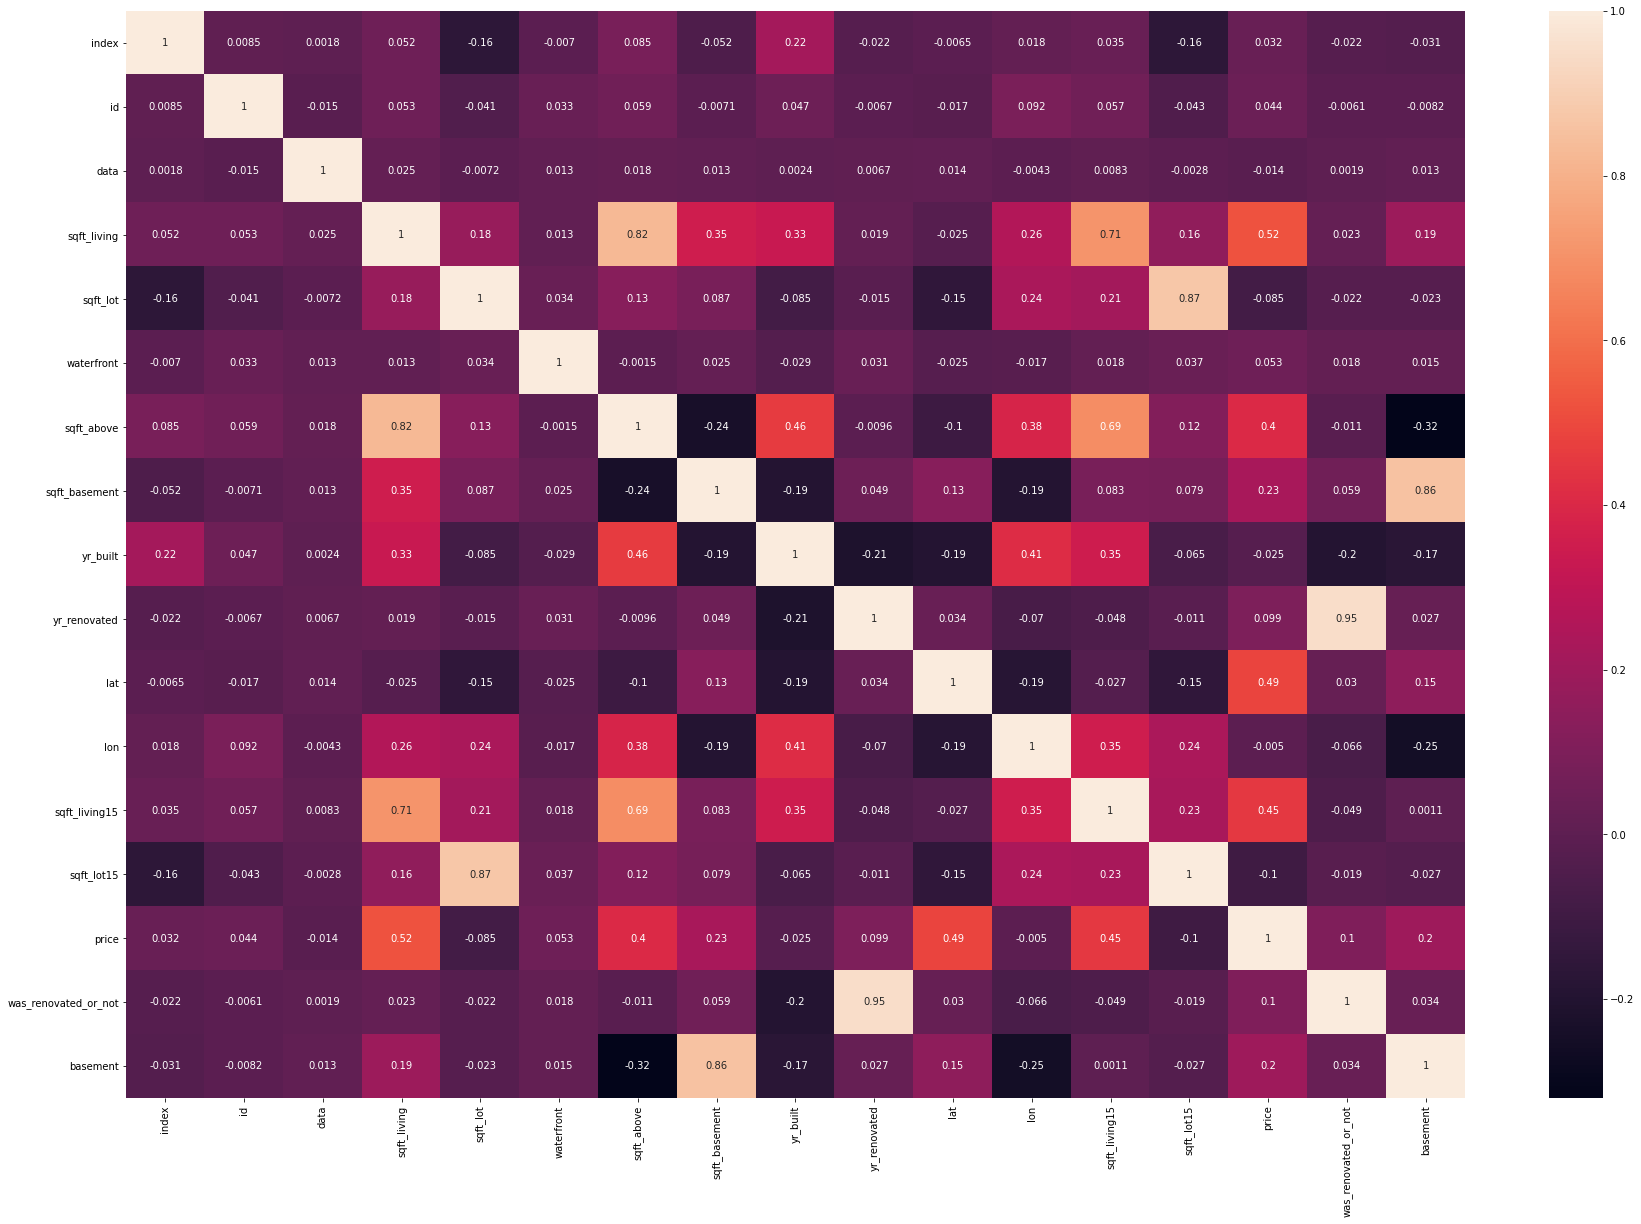

In [131]:
import seaborn as sns
corr_matrix=data9.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [132]:
numericals = data9.select_dtypes(include=['float64','int64'])
numericals.head()

index          id  data  sqft_living  sqft_lot  waterfront  sqft_above  \
0   6243  8850000509     9         1620      1444           0        1080   
1   8986   191100410     6         2470     10125           0        2470   
2   9419  6632300040     4         1140      7435           0        1140   
3  10155  7517500310     5         1460      6198           0        1460   
4  10436  7454000990     9          670      6720           0         670   

   sqft_basement  yr_built  yr_renovated      lat      lon  sqft_living15  \
0            540      2007             0  47.5892 -122.309           1660   
1              0      1960          2012  47.5651 -122.223           2290   
2              0      1952          1990  47.7300 -122.310           1320   
3              0      1916             0  47.6626 -122.361           2280   
4              0      1942             0  47.5151 -122.372            710   

   sqft_lot15   price  was_renovated_or_not  basement  
0        1642  525000                     0         1  
1       10125  970500                     2         0  
2        9385  327000                     1         0  
3        5160  775000                     0         0  
4        6720  304950                     0         0

In [133]:
categoricals = data9.select_dtypes(include=['object'])
categoricals.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

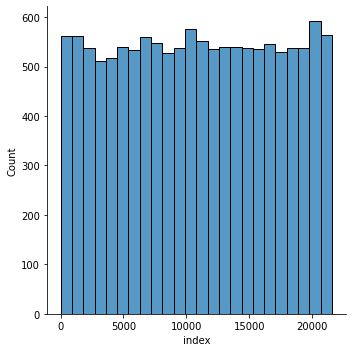

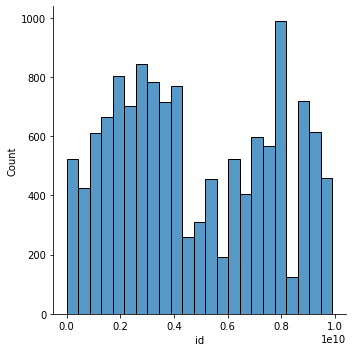

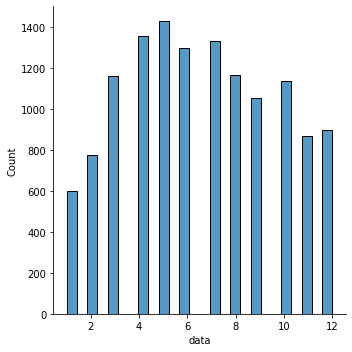

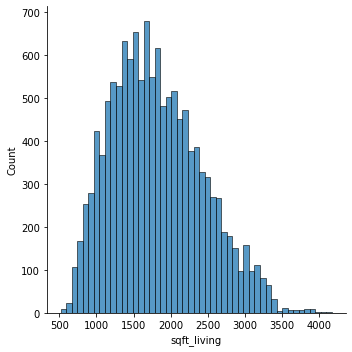

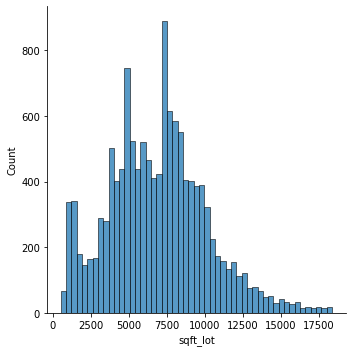

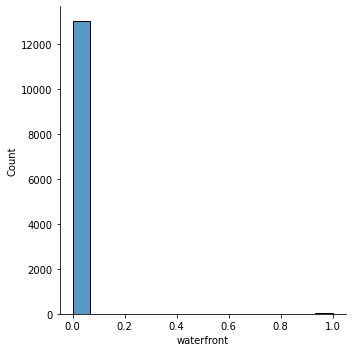

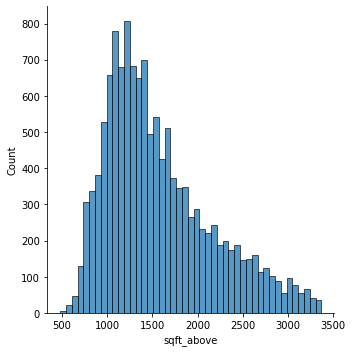

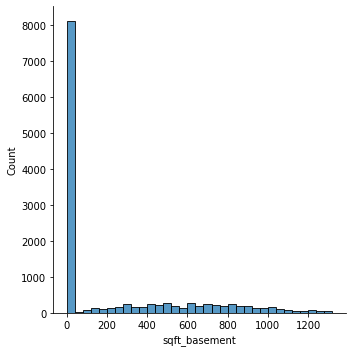

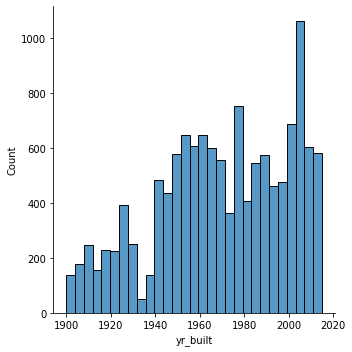

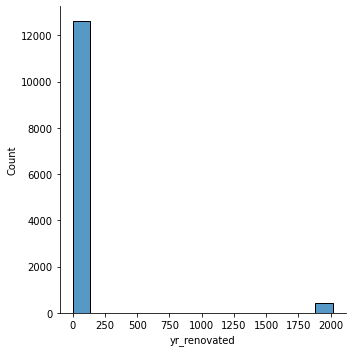

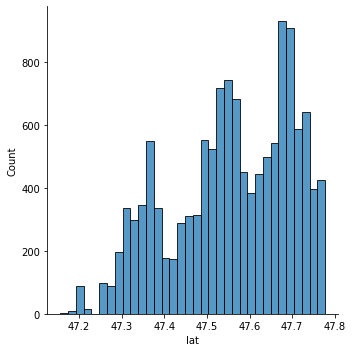

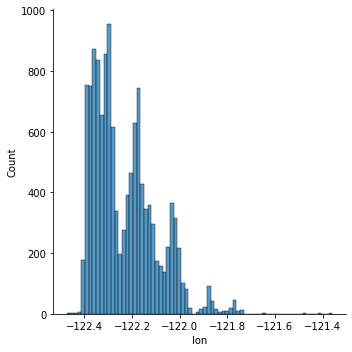

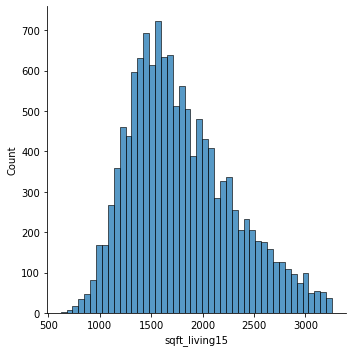

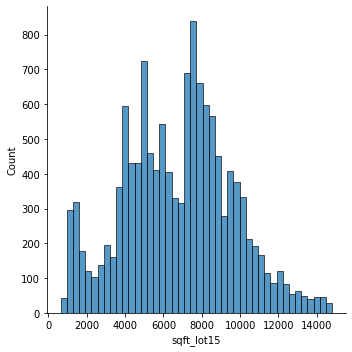

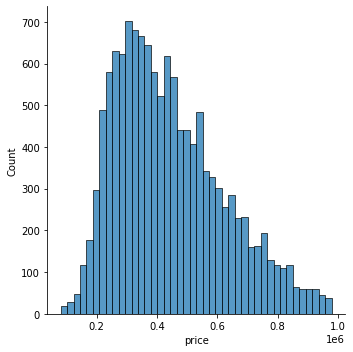

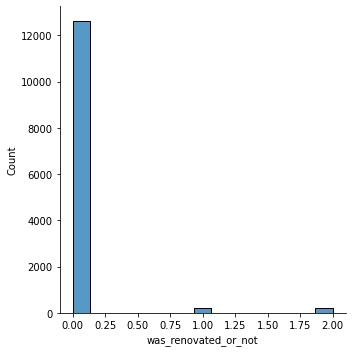

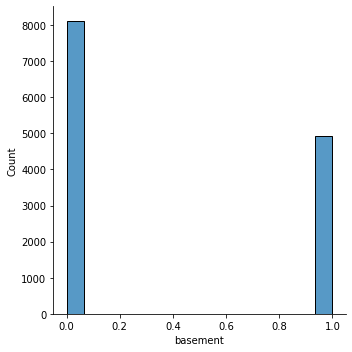

In [134]:
for column in numericals.columns:
    sns.displot(numericals[column])
    plt.show()

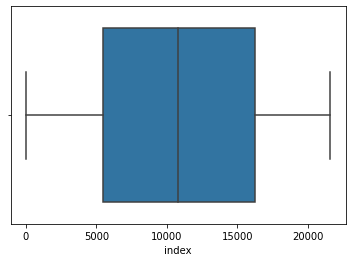

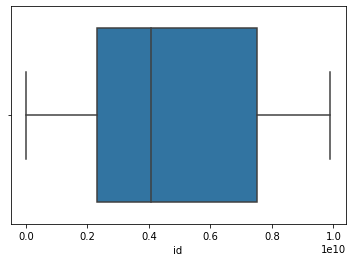

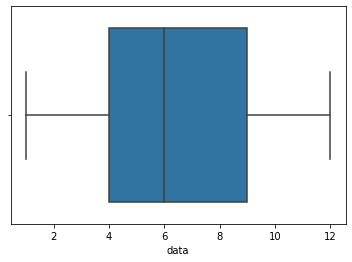

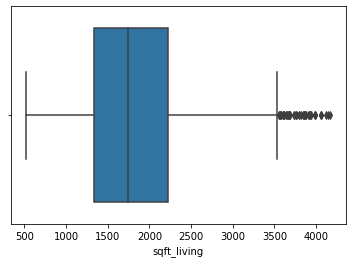

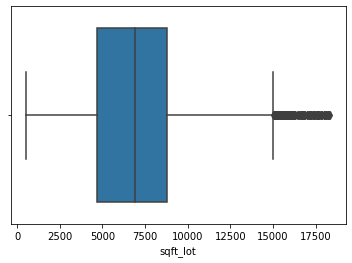

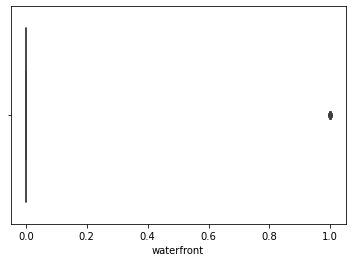

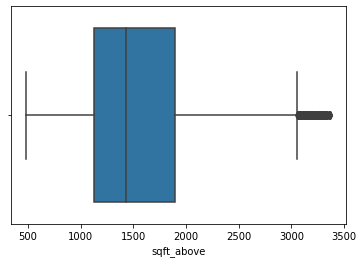

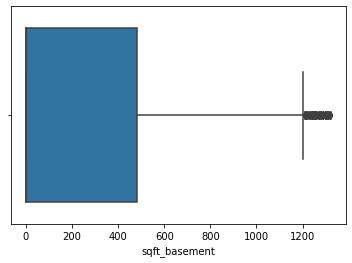

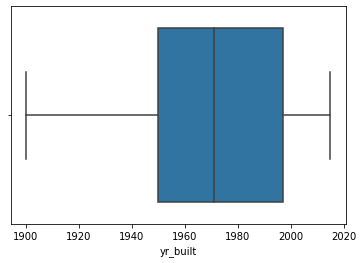

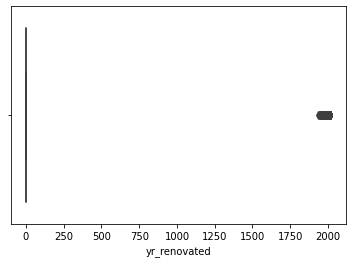

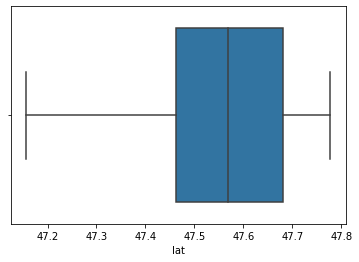

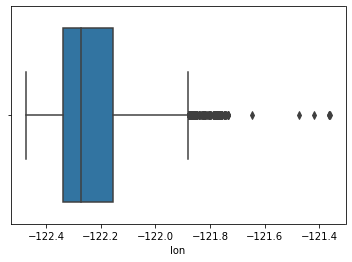

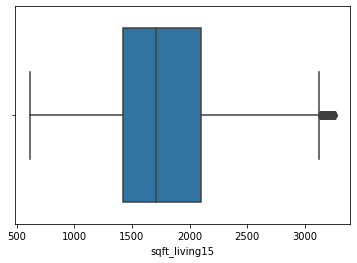

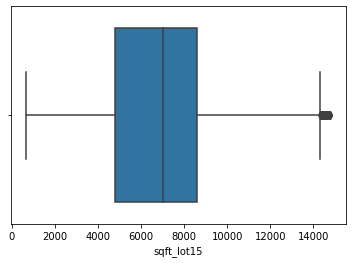

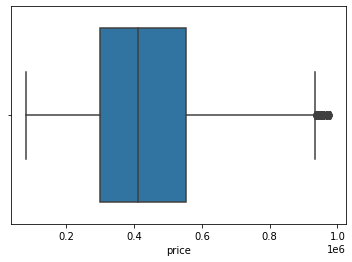

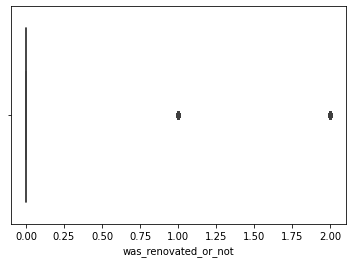

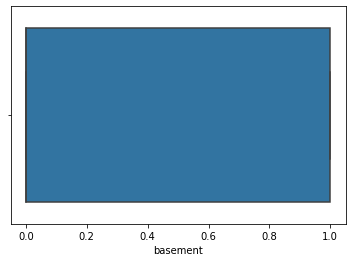

In [135]:
for column in numericals.columns:
    sns.boxplot(numericals[column])
    plt.show()


In [136]:
import seaborn as sns
for column in categoricals.columns:
    sns.countplot(categoricals[column])
    plt.show()

In [137]:
data9['bathrooms'] = data9['bathrooms'].astype('category')
data9['bedrooms'] = data9['bedrooms'].astype('category')
data9['floors'] = data9['floors'].astype('category')
data9['view'] = data9['view'].astype('category')
data9['condition'] = data9['condition'].astype('category')
data9['grade'] = data9['grade'].astype('category')
data9['was_renovated_or_not'] = data9['was_renovated_or_not'].astype('category')
data9['basement'] = data9['basement'].astype('category')

In [138]:
categoricals = data9.select_dtypes(include=['category'])
categoricals.head()

bedrooms bathrooms floors view condition grade zip_code  \
0        2      1.50    2.0    0         3     9    98144   
1        3      2.75    2.0    0         3     8    98040   
2        2      1.00    1.0    0         3     7    98125   
3        3      1.00    1.5    0         4     7    98107   
4        2      1.00    1.0    0         5     6    98126   

  was_renovated_or_not basement  
0                    0        1  
1                    2        0  
2                    1        0  
3                    0        0  
4                    0        0

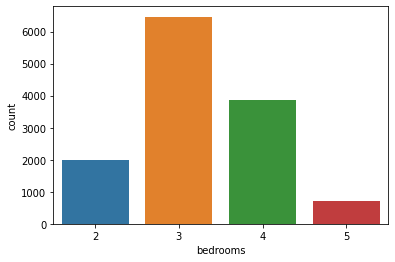

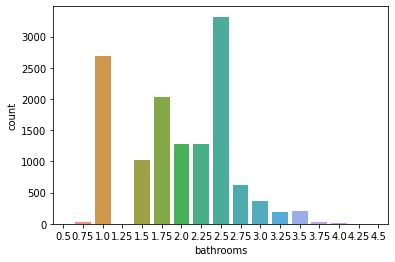

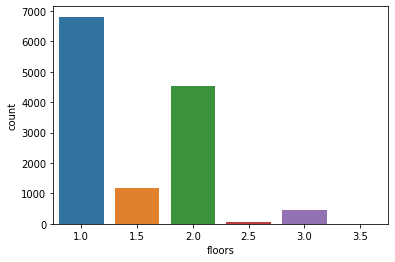

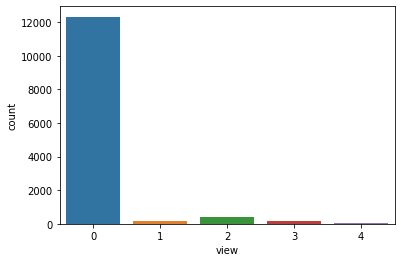

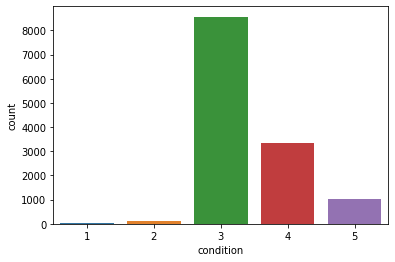

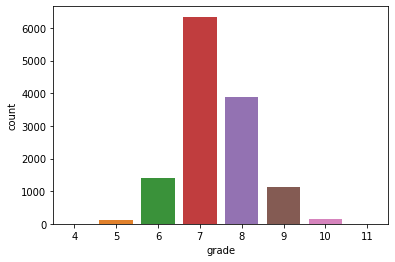

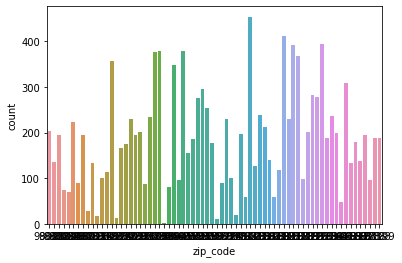

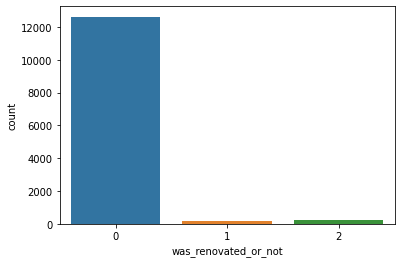

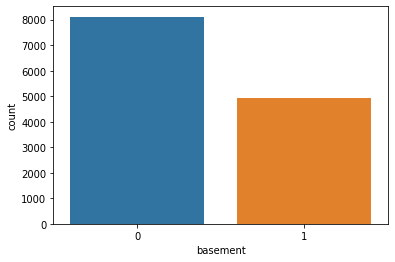

In [139]:
import seaborn as sns
for column in categoricals.columns:
    sns.countplot(categoricals[column])
    plt.show()

In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))


model_used = XGBRegressor()
model_used.fit(X_train_, y_train_)
score = model_used.score(X_test_, y_test_)
print(score)


0.849682068572664


In [141]:
print(score)

0.849682068572664


y_pred = model_used.predict(X_test)
results2 = mean_absolute_error(y_test, y_pred)
results3 = mean_squared_error(y_test, y_pred, squared=False)
print('R2 score:', score)
print('Mean Absolute Error:', results2)
print('Mean Squared Error:', results3)

In [142]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
scaler = StandardScaler()
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.9425577325972574
Test r2 score:  0.8499013444349228
Train RMSE: 41266.3581
Test RMSE: 68253.2571
Train MAE: 29856.0467
Test MAE: 47259.4272


In [143]:
data9.describe()

index            id          data   sqft_living      sqft_lot  \
count  13053.000000  1.305300e+04  13053.000000  13053.000000  13053.000000   
mean   10838.417988  4.758437e+09      6.562093   1811.535356   6887.668429   
std     6261.958156  2.876632e+09      3.131246    611.795527   3233.220043   
min        0.000000  3.600057e+06      1.000000    520.000000    520.000000   
25%     5464.000000  2.313900e+09      4.000000   1340.000000   4673.000000   
50%    10825.000000  4.077800e+09      6.000000   1740.000000   6927.000000   
75%    16261.000000  7.517501e+09      9.000000   2220.000000   8814.000000   
max    21595.000000  9.900000e+09     12.000000   4170.000000  18360.000000   

         waterfront    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  13053.000000  13053.000000   13053.000000  13053.000000  13053.000000   
mean       0.001149   1573.133379     238.401977   1969.968130     66.057994   
std        0.033881    589.014010     356.179656     29.906726    357.077773   
min        0.000000    480.000000       0.000000   1900.000000      0.000000   
25%        0.000000   1130.000000       0.000000   1950.000000      0.000000   
50%        0.000000   1430.000000       0.000000   1971.000000      0.000000   
75%        0.000000   1900.000000     480.000000   1997.000000      0.000000   
max        1.000000   3370.000000    1320.000000   2015.000000   2015.000000   

                lat           lon  sqft_living15    sqft_lot15          price  
count  13053.000000  13053.000000   13053.000000  13053.000000   13053.000000  
mean      47.558250   -122.232025    1794.138129   6769.091473  442218.124876  
std        0.139933      0.130580     500.652748   2834.712705  179394.730536  
min       47.155900   -122.475000     620.000000    651.000000   81000.000000  
25%       47.463100   -122.339000    1420.000000   4800.000000  300500.000000  
50%       47.567700   -122.272000    1710.000000   7034.000000  412000.000000  
75%       47.680700   -122.155000    2100.000000   8601.000000  554000.000000  
max       47.777600   -121.359000    3260.000000  14789.000000  979000.000000

In [144]:
data9.columns

Index(['index', 'id', 'data', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price',
       'was_renovated_or_not', 'basement'],
      dtype='object')

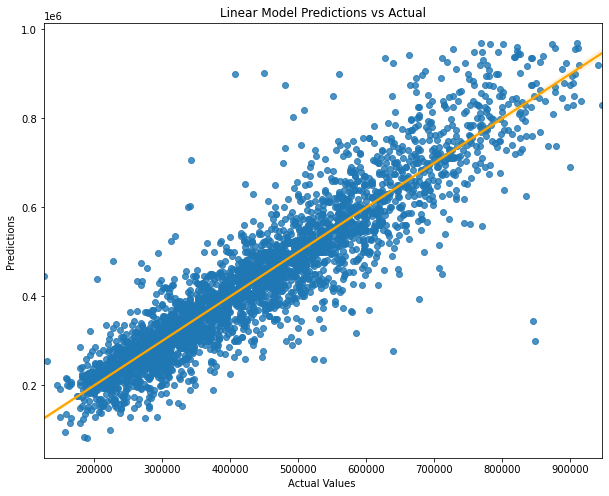

In [145]:
# fancy plotting
plt.figure(figsize=(10,8))
sns.regplot(x=y_pred2, y=y_test_, line_kws={"color": "orange"})
plt.xlabel('Actual Values ')
plt.ylabel('Predictions ')
plt.title('Linear Model Predictions vs Actual')
plt.show()

In [146]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
scaler = StandardScaler()
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=100)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.9425577325972574
Test r2 score:  0.8499013444349228
Train RMSE: 41266.3581
Test RMSE: 68253.2571
Train MAE: 29856.0467
Test MAE: 47259.4272


In [147]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
scaler = StandardScaler()
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.30, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.9245029074429303
Test r2 score:  0.8524839763398593
Train RMSE: 46965.3873
Test RMSE: 67764.5618
Train MAE: 34254.1326
Test MAE: 47826.0831


In [148]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.metrics import mean_squared_error as MSE
scaler = PowerTransformer(method='yeo-johnson')
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=100)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.9300538647646106
Test r2 score:  0.8519838138223077
Train RMSE: 45330.7675
Test RMSE: 67778.1304
Train MAE: 32958.3406
Test MAE: 47187.0791


In [149]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.metrics import mean_squared_error as MSE
scaler = PowerTransformer(method='yeo-johnson')
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=100)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.9300538647646106
Test r2 score:  0.8519838138223077
Train RMSE: 45330.7675
Test RMSE: 67778.1304
Train MAE: 32958.3406
Test MAE: 47187.0791


In [150]:
data9.describe()

index            id          data   sqft_living      sqft_lot  \
count  13053.000000  1.305300e+04  13053.000000  13053.000000  13053.000000   
mean   10838.417988  4.758437e+09      6.562093   1811.535356   6887.668429   
std     6261.958156  2.876632e+09      3.131246    611.795527   3233.220043   
min        0.000000  3.600057e+06      1.000000    520.000000    520.000000   
25%     5464.000000  2.313900e+09      4.000000   1340.000000   4673.000000   
50%    10825.000000  4.077800e+09      6.000000   1740.000000   6927.000000   
75%    16261.000000  7.517501e+09      9.000000   2220.000000   8814.000000   
max    21595.000000  9.900000e+09     12.000000   4170.000000  18360.000000   

         waterfront    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  13053.000000  13053.000000   13053.000000  13053.000000  13053.000000   
mean       0.001149   1573.133379     238.401977   1969.968130     66.057994   
std        0.033881    589.014010     356.179656     29.906726    357.077773   
min        0.000000    480.000000       0.000000   1900.000000      0.000000   
25%        0.000000   1130.000000       0.000000   1950.000000      0.000000   
50%        0.000000   1430.000000       0.000000   1971.000000      0.000000   
75%        0.000000   1900.000000     480.000000   1997.000000      0.000000   
max        1.000000   3370.000000    1320.000000   2015.000000   2015.000000   

                lat           lon  sqft_living15    sqft_lot15          price  
count  13053.000000  13053.000000   13053.000000  13053.000000   13053.000000  
mean      47.558250   -122.232025    1794.138129   6769.091473  442218.124876  
std        0.139933      0.130580     500.652748   2834.712705  179394.730536  
min       47.155900   -122.475000     620.000000    651.000000   81000.000000  
25%       47.463100   -122.339000    1420.000000   4800.000000  300500.000000  
50%       47.567700   -122.272000    1710.000000   7034.000000  412000.000000  
75%       47.680700   -122.155000    2100.000000   8601.000000  554000.000000  
max       47.777600   -121.359000    3260.000000  14789.000000  979000.000000

#even dropping collumns with values over 0 box-cox does not work
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
scaler = PowerTransformer(method='box-cox')
   
X = pd.get_dummies(data9.drop(['index', 'id', 'price', 'lon', 'lat', 'waterfront', 'sqft_basement', 'yr_renovated' ], axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

In [151]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler()
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)


Train r2 score:  0.9335499585254561
Test r2 score:  0.8482545781500836
Train RMSE: 44265.1992
Test RMSE: 68626.6467
Train MAE: 32122.0024
Test MAE: 47577.7916


In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = RobustScaler()
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))


model_used = LinearRegression()
model_used.fit(X_train_, y_train_)
score = model_used.score(X_test_, y_test_)
print(score)

predictions = model_used.predict(X_test) # predict some values

rmse = mean_squared_error(y_test_, predictions, squared=False) # or mse with squared=True
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, good to see if the errors are big, the values returnes are in the unit of the target
print("R2_score:", round(model_used.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)

0.8181332154547842
R2_score: -391431522604849.44
RMSE: 3550446437236.7246


In [152]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
scaler = RobustScaler()
   
X = pd.get_dummies(data9.drop('price', axis=1))
y = data9['price']

X_train, X_test, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

scaler.fit(X_train)
X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.934260588548288
Test r2 score:  0.8483125194652371
Train RMSE: 44057.6258
Test RMSE: 68613.5436
Train MAE: 31973.9086
Test MAE: 47596.4127


#### using row-wise transformers, the best fit is StandardScaler() with XGBoost

Train r2 score:  0.9425577325972574
Test r2 score:  0.8499013444349228
Train RMSE: 41266.3581
Test RMSE: 68253.2571

In [153]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold\

scaler = Normalizer()
   
X = data.drop('price', axis=1)
y = data['price']


X_num = scaler.fit_transform(X.select_dtypes(np.number))
            
X_cat = pd.get_dummies(X.select_dtypes(exclude=np.number))

X_ = np.concatenate((X_num, X_cat), axis=1)

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.25, random_state=42)

xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train_, y_train_, early_stopping_rounds=5, 
             eval_set=[(X_test_, y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train_)
y_pred2 = xgb_model2.predict(X_test_)

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  0.9111398563515551
Test r2 score:  0.6843077167173356
Train RMSE: 99222.8609
Test RMSE: 223399.5275
Train MAE: 73825.2907
Test MAE: 125274.3661


In [103]:
### I'm still kicking ultimation's ass :P

In [104]:
def funky_function2(data, model_list):
    X = pd.get_dummies(data9.drop('price', axis=1))
    y = data9['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', results[model])
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
    final_result = max(results.values())
    print("--------------------------------------------------------------------------------------------------------")
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print('R2 score:', final_result)
    print('Mean Absolute Error:', results2)
    print('Mean Squared Error:', results3)
    return max(results, key=results.get)
        

In [105]:
funky_function2(data9, model_list)

LinearRegression() R2 score: 0.8182859551141711
Mean Absolute Error: 54952.69371325941
Mean Squared Error: 75098.14818168855
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.7245251580359096
Mean Absolute Error: 64703.59037990196
Mean Squared Error: 92464.69712908143
KNeighborsRegressor(n_jobs=10) R2 score: 0.7392814413866184
Mean Absolute Error: 62945.53749999999
Mean Squared Error: 89954.09806113616
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.7471169028567417
Mean Absolute Error: 62092.83438375349
Mean Squared Error: 88592.07647656341
MLPRegressor(random_state=42) R2 score: -3.788699836545929
Mean Absolute Error: 361262.4381481799
Mean Squared Error: 385517.2256847054
RandomForestRegressor() R2 score: 0.8365959354051085
Mean Absolute Error: 49277.0929442402
Mean Squared Error: 71214.16849140654
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
def funky_function3(data, model_list):
    X = data.drop(['price'], axis=1)
    X = pd.get_dummies(X)
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    results = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', results[model])
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
    final_result = max(results.values())
    print("--------------------------------------------------------------------------------------------------------")
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print('R2 score:', final_result)
    print('Mean Absolute Error:', results2)
    print('Mean Squared Error:', results3)
    return max(results, key=results.get)

In [107]:
funky_function3(data9, model_list)

LinearRegression() R2 score: 0.807216152984277
Mean Absolute Error: 56142.18200147766
Mean Squared Error: 77472.91716535202
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.36675203883498275
Mean Absolute Error: 99625.17911400486
Mean Squared Error: 140411.1150049907
KNeighborsRegressor(n_jobs=10) R2 score: 0.3562249174538049
Mean Absolute Error: 102607.72485637688
Mean Squared Error: 141573.40243981185
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.3342466929987139
Mean Absolute Error: 106080.44121026427
Mean Squared Error: 143969.7512213625
MLPRegressor(random_state=42) R2 score: -2.24841297965041
Mean Absolute Error: 262573.85235349374
Mean Squared Error: 318016.90495194914
RandomForestRegressor() R2 score: 0.8281144660496473
Mean Absolute Error: 50313.222451168134
Mean Squared Error: 73153.35550878511
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importanc

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
def funky_function4(data, model_list):
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    for model in model_list:
        model.fit(X_train, y_train)
        print(model, 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
        results[model] = results2
    final_result = min(results.values())
    print("--------------------------------------------------------------------------------------------------------")
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print('R2 score:', final_result)
    print('Mean Absolute Error:', results2)
    print('Mean Squared Error:', results3)
    return min(results, key=results.get)

In [109]:
def funky_function4_1(data, model_list):
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    results_mae = {}
    results_mse = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
        results_mae[model] = results2
        results_mse[model] = results3
    final_result_r2 = max(results.values())
    final_result_mae = min(results_mae.values())
    final_result_mse = min(results_mse.values())
    print("--------------------------------------------------------------------------------------------------------")     
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print("--------------------------------------------------------------------------------------------------------")
    print('Best R2:', model, final_result_r2)
    print('Best Mean Absolute Error:', model, final_result_mae)
    print('Best Mean Squared Error:', model, final_result_mse)
    return max(results, key=results.get)
    return min(results_mae, key=results_mae.get)

In [110]:
funky_function4_1(data9, model_list)

LinearRegression() R2 score: 0.8182859551141711
Mean Absolute Error: 54952.69371325941
Mean Squared Error: 75098.14818168855
KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.7245251580359096
Mean Absolute Error: 64703.59037990196
Mean Squared Error: 92464.69712908143
KNeighborsRegressor(n_jobs=10) R2 score: 0.7392814413866184
Mean Absolute Error: 62945.53749999999
Mean Squared Error: 89954.09806113616
KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.7471169028567417
Mean Absolute Error: 62092.83438375349
Mean Squared Error: 88592.07647656341
MLPRegressor(random_state=42) R2 score: -3.788699836545929
Mean Absolute Error: 361262.4381481799
Mean Squared Error: 385517.2256847054
RandomForestRegressor() R2 score: 0.8359877753762459
Mean Absolute Error: 49370.60175245097
Mean Squared Error: 71346.56846590224
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_typ

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [111]:
def funky_function4_1_1(data, model_list):
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    results_mae = {}
    results_mse = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
        results_mae[model] = results2
        results_mse[model] = results3
        plt.figure(figsize=(10,8))
        sns.regplot(x=y_pred, y=y_test, line_kws={"color": "orange"})
        plt.xlabel('Actual Values ')
        plt.ylabel('Predictions ')
        plt.title('Linear Model Predictions vs Actual')
        plt.show()
    final_result_r2 = max(results.values())
    final_result_mae = min(results_mae.values())
    final_result_mse = min(results_mse.values())
    print("--------------------------------------------------------------------------------------------------------")     
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print("--------------------------------------------------------------------------------------------------------")
    print('Best R2:', model, final_result_r2)
    print('Best Mean Absolute Error:', model, final_result_mae)
    print('Best Mean Squared Error:', model, final_result_mse)
    return max(results, key=results.get)
    return min(results_mae, key=results_mae.get)

LinearRegression() R2 score: 0.8182859551141711
Mean Absolute Error: 54952.69371325941
Mean Squared Error: 75098.14818168855


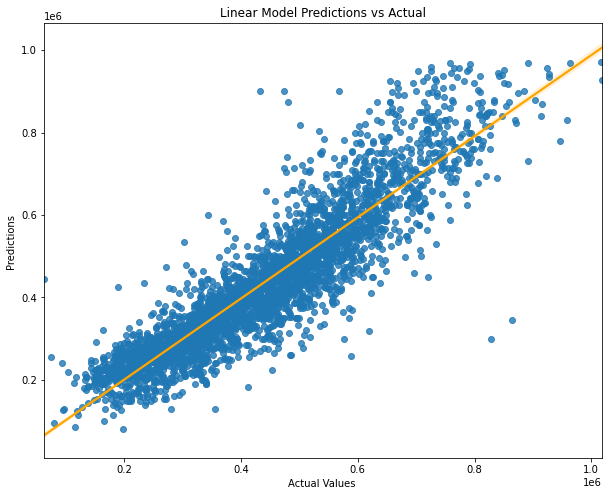

KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.7245251580359096
Mean Absolute Error: 64703.59037990196
Mean Squared Error: 92464.69712908143


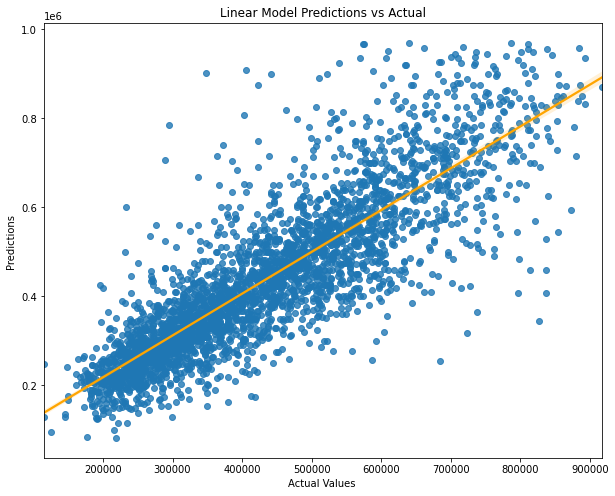

KNeighborsRegressor(n_jobs=10) R2 score: 0.7392814413866184
Mean Absolute Error: 62945.53749999999
Mean Squared Error: 89954.09806113616


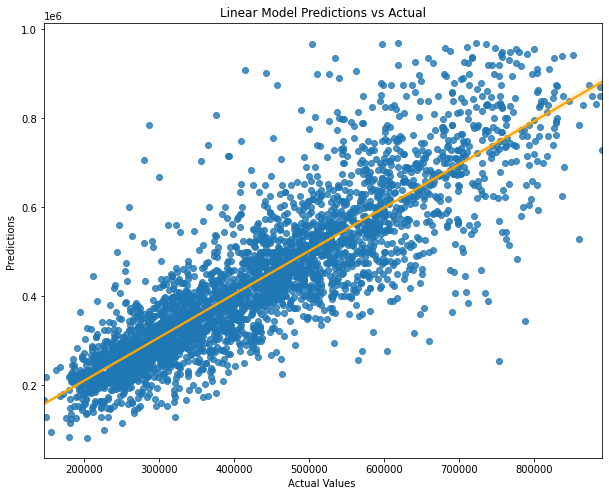

KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.7471169028567417
Mean Absolute Error: 62092.83438375349
Mean Squared Error: 88592.07647656341


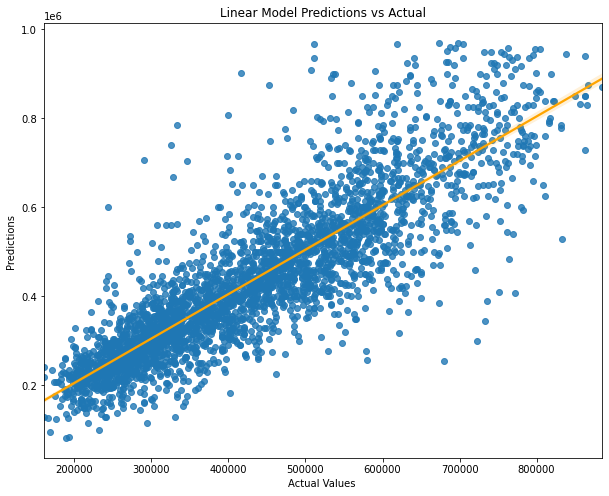

MLPRegressor(random_state=42) R2 score: -3.788699836545929
Mean Absolute Error: 361262.4381481799
Mean Squared Error: 385517.2256847054


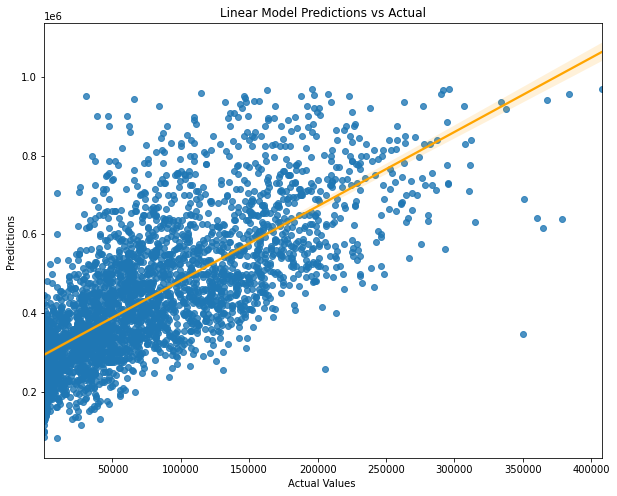

RandomForestRegressor() R2 score: 0.8370535700766333
Mean Absolute Error: 49226.55633272059
Mean Squared Error: 71114.3762282946


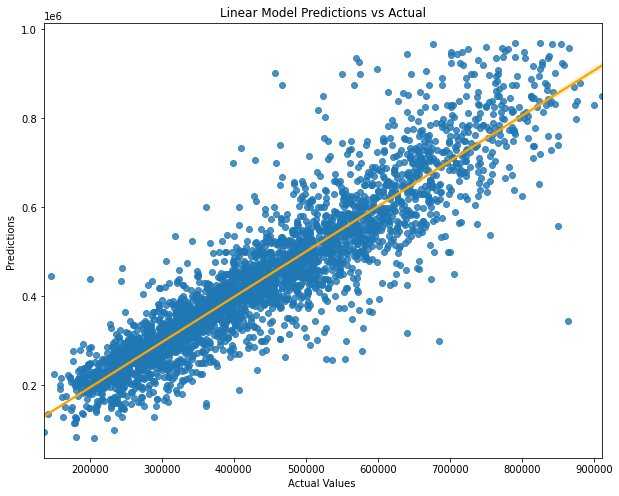

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.8413548867378593
Mean Absolute Error: 48984.155821557135
Mean Squared Error: 70169.49156258661


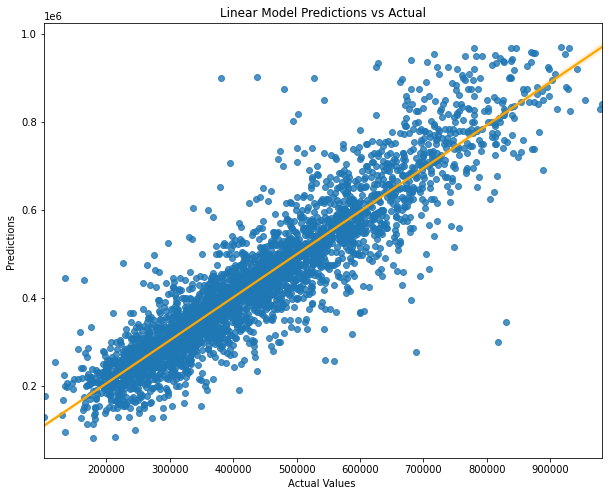

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.849682068572664
Mean Absolute Error: 47296.43258128447
Mean Squared Error: 68303.09378908419


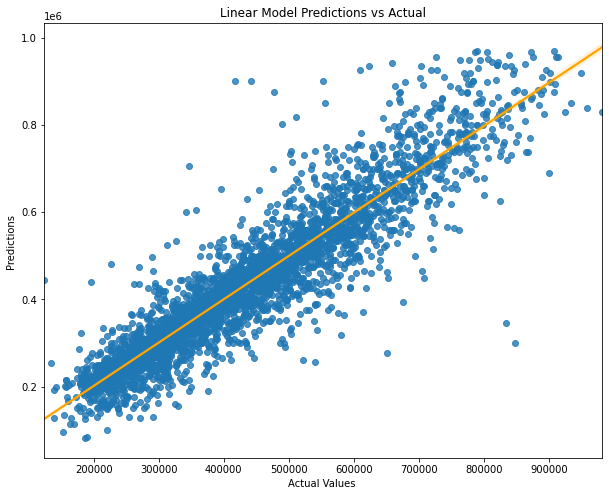

--------------------------------------------------------------------------------------------------------
TAA DAAA!! AND THE WINNER IIIISSSSS:
--------------------------------------------------------------------------------------------------------
Best R2: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 0.849682068572664
Best Mean Absolute Error: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
funky_function4_1_1(data9, model_list)

In [113]:
def funky_function4_1_2(data, model_list):
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    results_mae = {}
    results_mse = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
        results_mae[model] = results2
        results_mse[model] = results3
        plt.figure(figsize=(10,8))
        sns.regplot(x=y_pred, y=y_test, line_kws={"color": "orange"})
        plt.xlabel('Actual Values ')
        plt.ylabel('Predictions ')
        plt.title('Linear Model Predictions vs Actual')
        plt.show()
    final_result_r2 = max(results.values())
    final_result_mae = min(results_mae.values())
    final_result_mse = min(results_mse.values())
    print("--------------------------------------------------------------------------------------------------------")     
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print("--------------------------------------------------------------------------------------------------------")
    print('Best R2:', model, final_result_r2)
    print('Best Mean Absolute Error:', model, final_result_mae)
    print('Best Mean Squared Error:', model, final_result_mse)
    print("--------------------------------------------------------------------------------------------------------")
    print('Fancy plotting incoming:')
    plt.figure(figsize=(10,8))
    sns.regplot(x=model.predict(X_test), y=y_test, line_kws={"color": "purple"})
    plt.xlabel('Actual Values ')
    plt.ylabel('Predictions ')
    plt.title('Linear Model Predictions vs Actual')
    plt.show()
    return max(results, key=results.get)
    return min(results_mae, key=results_mae.get)
    

LinearRegression() R2 score: 0.8182859551141711
Mean Absolute Error: 54952.69371325941
Mean Squared Error: 75098.14818168855


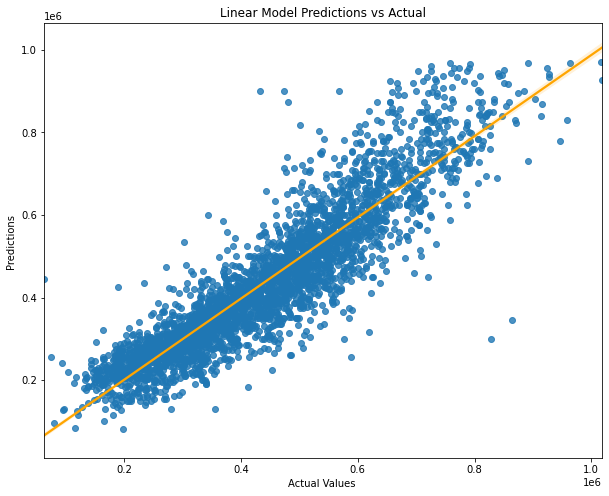

KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.7245251580359096
Mean Absolute Error: 64703.59037990196
Mean Squared Error: 92464.69712908143


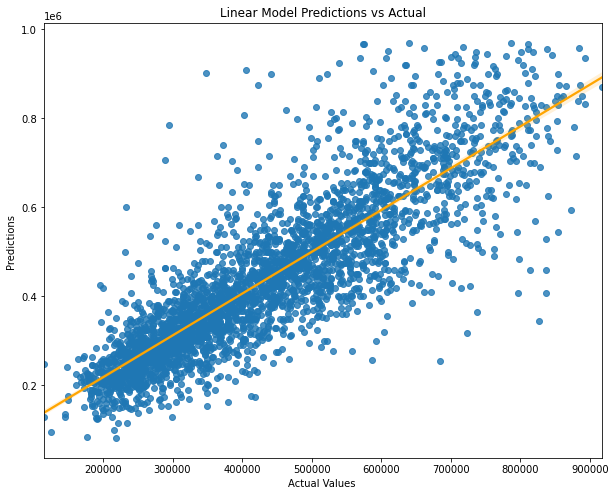

KNeighborsRegressor(n_jobs=10) R2 score: 0.7392814413866184
Mean Absolute Error: 62945.53749999999
Mean Squared Error: 89954.09806113616


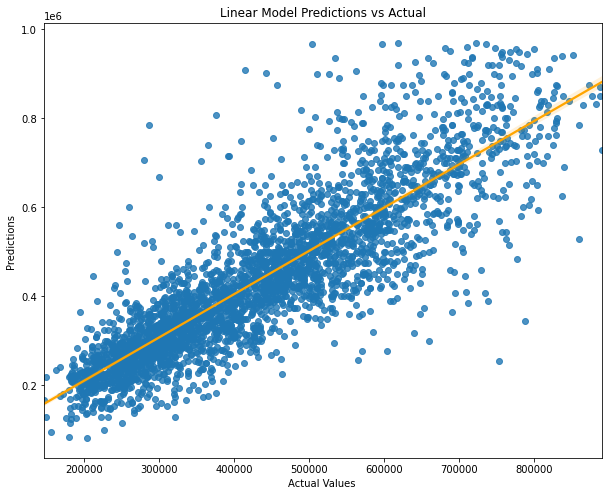

KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.7471169028567417
Mean Absolute Error: 62092.83438375349
Mean Squared Error: 88592.07647656341


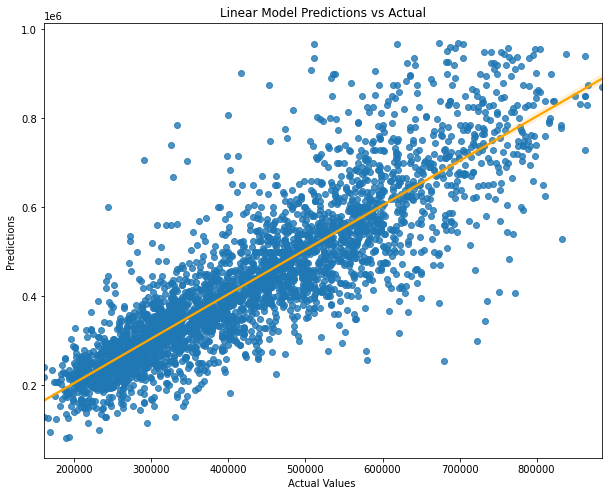

MLPRegressor(random_state=42) R2 score: -3.788699836545929
Mean Absolute Error: 361262.4381481799
Mean Squared Error: 385517.2256847054


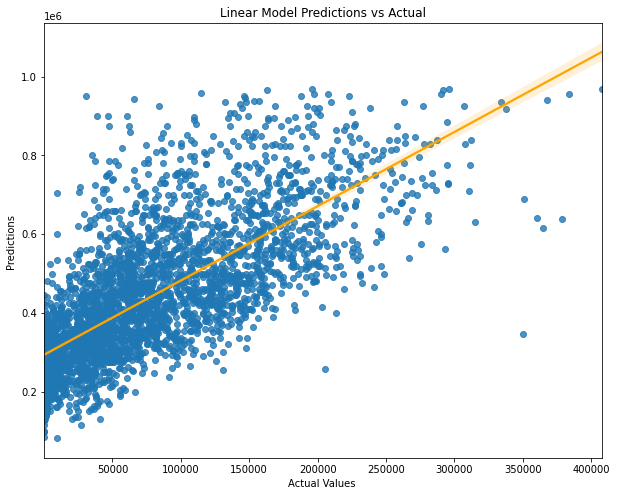

RandomForestRegressor() R2 score: 0.8348021616064918
Mean Absolute Error: 49619.44493259804
Mean Squared Error: 71603.97962492528


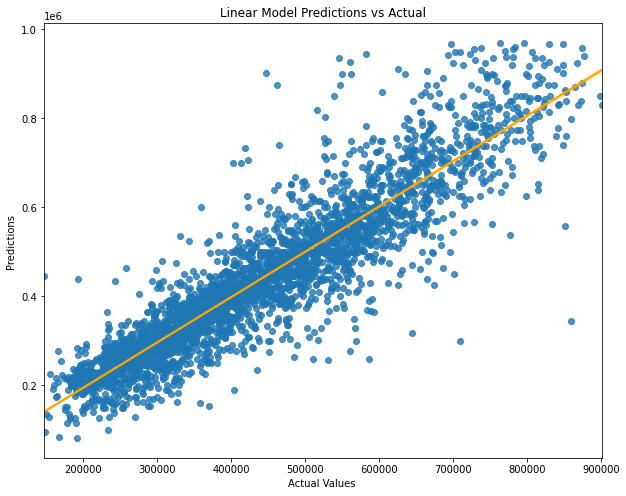

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.8413548867378593
Mean Absolute Error: 48984.155821557135
Mean Squared Error: 70169.49156258661


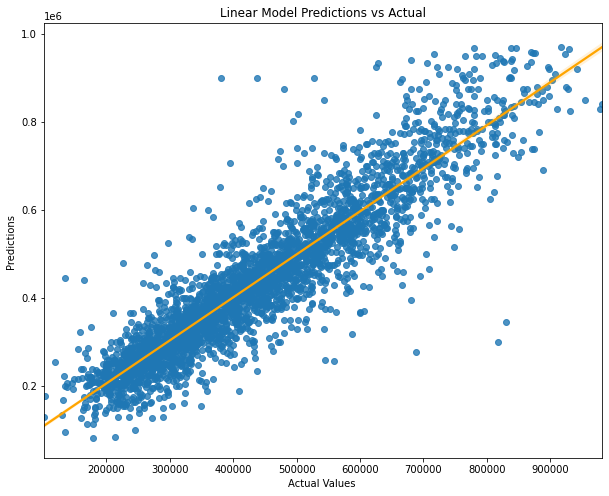

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.849682068572664
Mean Absolute Error: 47296.43258128447
Mean Squared Error: 68303.09378908419


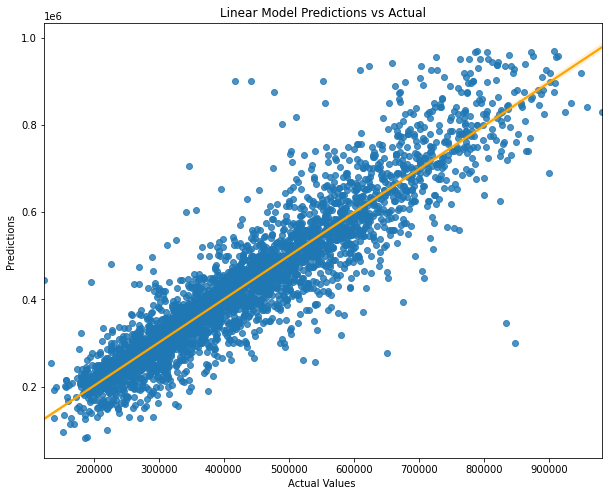

--------------------------------------------------------------------------------------------------------
TAA DAAA!! AND THE WINNER IIIISSSSS:
--------------------------------------------------------------------------------------------------------
Best R2: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 0.849682068572664
Best Mean Absolute Error: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamm

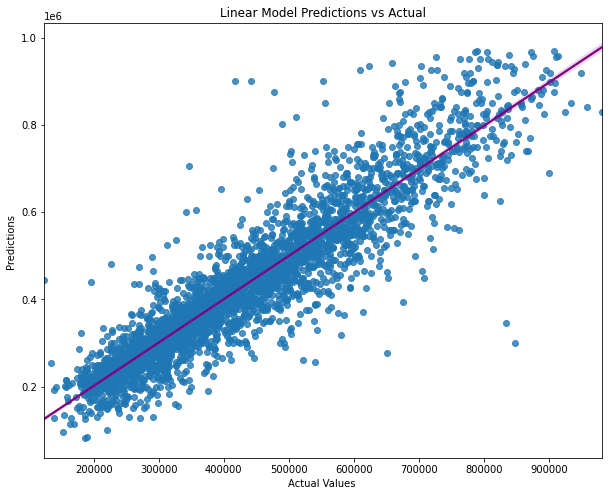

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
funky_function4_1_2(data9, model_list)

In [115]:
def funky_function4_1_3(data, model_list):
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    results_mae = {}
    results_mse = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
        results_mae[model] = results2
        results_mse[model] = results3
        plt.figure(figsize=(10,8))
        sns.regplot(x=y_pred, y=y_test, line_kws={"color": "orange"})
        plt.xlabel('Actual Values ')
        plt.ylabel('Predictions ')
        plt.title('Linear Model Predictions vs Actual')
        plt.show()
    final_result_r2 = max(results.values())
    final_result_mae = min(results_mae.values())
    final_result_mse = min(results_mse.values())
    print("--------------------------------------------------------------------------------------------------------")
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print("--------------------------------------------------------------------------------------------------------")
    best_mae_model = min(results_mae, key=results_mae.get)
    best_r2_model = max(results, key=results.get)
    best_mse_model = min(results_mse, key=results_mse.get)
    print('Best R2:', best_r2_model, final_result_r2)
    print('Best Mean Absolute Error:', best_mae_model, final_result_mae)
    print('Best Mean Squared Error:', best_mse_model, final_result_mse)
    plt.figure(figsize=(10,8))
    sns.regplot(x=best_r2_model.predict(X_test), y=y_test, line_kws={"color": "orange"})
    plt.xlabel('Actual Values ')
    plt.ylabel('Predictions ')
    plt.title('Linear Model Predictions vs Actual')
    plt.show()
    return best_mae_model, best_mse_model, best_r2_model

In [116]:
def funky_function4_1_4(data, model_list):
    X = pd.get_dummies(data.drop('price', axis=1))
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    results_mae = {}
    results_mse = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
        results_mae[model] = results2
        results_mse[model] = results3
        plt.figure(figsize=(10,8))
        sns.regplot(x=y_pred, y=y_test, line_kws={"color": "orange"})
        plt.xlabel('Actual Values ')
        plt.ylabel('Predictions ')
        plt.title('Linear Model Predictions vs Actual')
        plt.show()
    final_result_r2 = max(results.values())
    final_result_mae = min(results_mae.values())
    final_result_mse = min(results_mse.values())
    print("--------------------------------------------------------------------------------------------------------")
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print("--------------------------------------------------------------------------------------------------------")
    best_mae_model = min(results_mae, key=results_mae.get)
    best_r2_model = max(results, key=results.get)
    best_mse_model = min(results_mse, key=results_mse.get)
    print('Best R2:', best_r2_model, final_result_r2)
    print('Best Mean Absolute Error:', best_mae_model, final_result_mae)
    print('Best Mean Squared Error:', best_mse_model, final_result_mse)
    plt.figure(figsize=(10,8))
    sns.regplot(x=best_r2_model.predict(X_test), y=y_test, line_kws={"color": "orange"})
    plt.xlabel('Actual Values ')
    plt.ylabel('Predictions ')
    plt.title('Linear Model Predictions vs Actual')
    plt.show()
    plt.figure(figsize=(10,8))
    sns.regplot(x=best_mse_model.predict(X_test), y=y_test, line_kws={"color": "orange"})
    plt.xlabel('Actual Values ')
    plt.ylabel('Predictions ')
    plt.title('Linear Model Predictions vs Actual')
    plt.show()
    return best_mae_model, best_mse_model, best_r2_model

LinearRegression() R2 score: 0.8182859551141711
Mean Absolute Error: 54952.69371325941
Mean Squared Error: 75098.14818168855


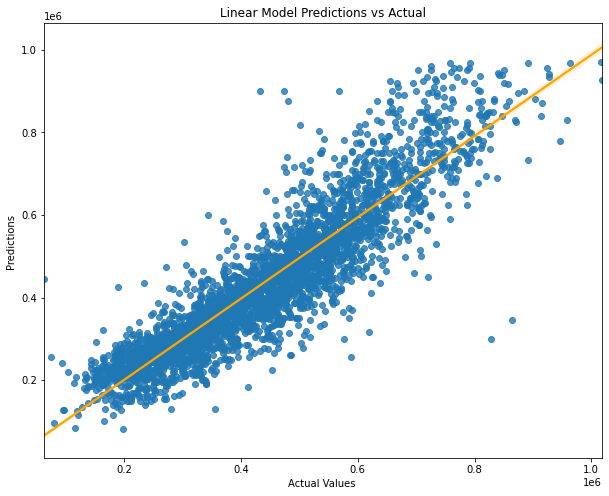

KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.7245251580359096
Mean Absolute Error: 64703.59037990196
Mean Squared Error: 92464.69712908143


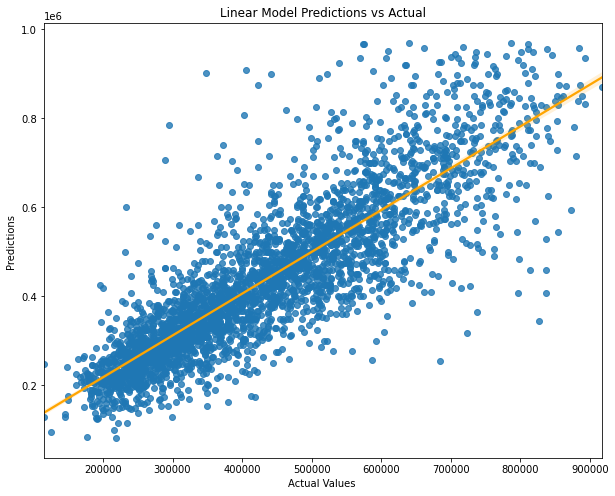

KNeighborsRegressor(n_jobs=10) R2 score: 0.7392814413866184
Mean Absolute Error: 62945.53749999999
Mean Squared Error: 89954.09806113616


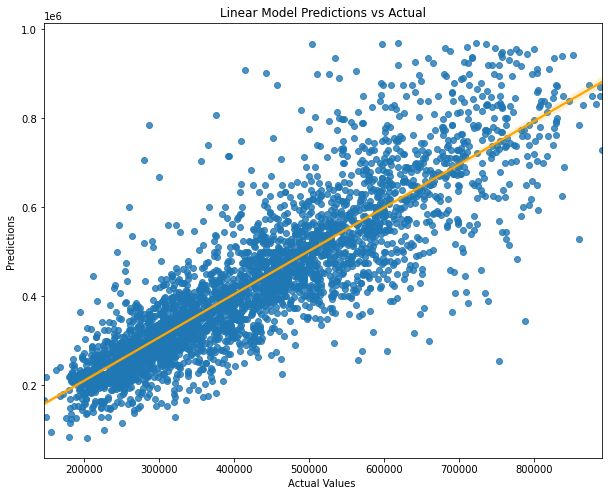

KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.7471169028567417
Mean Absolute Error: 62092.83438375349
Mean Squared Error: 88592.07647656341


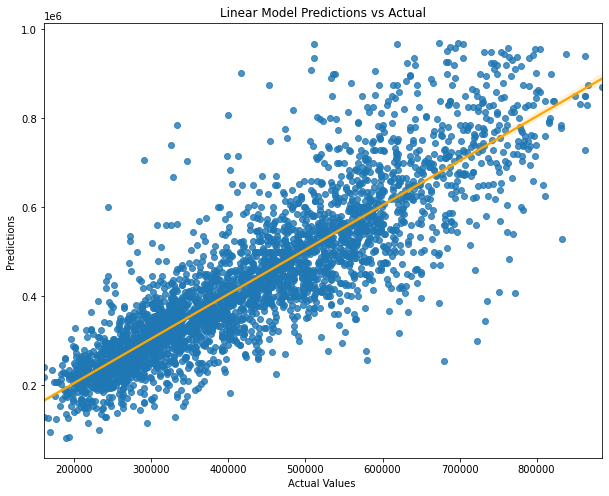

MLPRegressor(random_state=42) R2 score: -3.788699836545929
Mean Absolute Error: 361262.4381481799
Mean Squared Error: 385517.2256847054


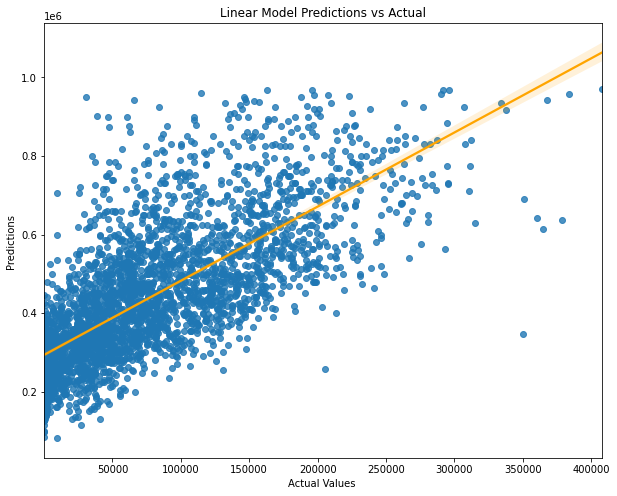

RandomForestRegressor() R2 score: 0.8369331837142424
Mean Absolute Error: 49287.373020833336
Mean Squared Error: 71140.64136457785


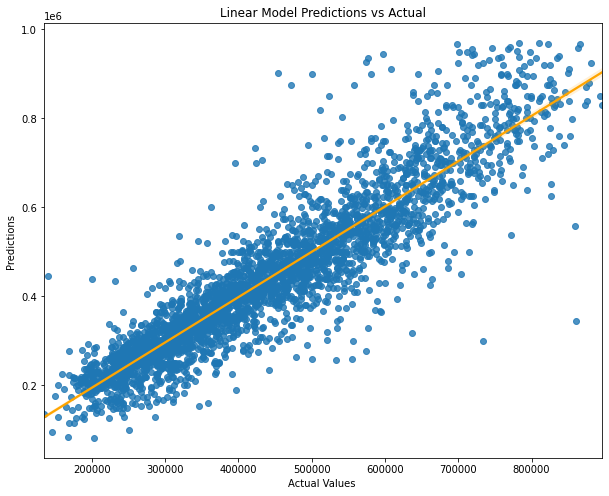

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.8413548867378593
Mean Absolute Error: 48984.155821557135
Mean Squared Error: 70169.49156258661


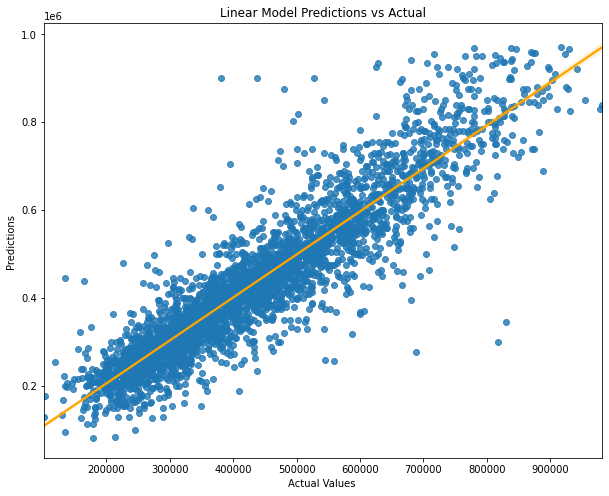

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.849682068572664
Mean Absolute Error: 47296.43258128447
Mean Squared Error: 68303.09378908419


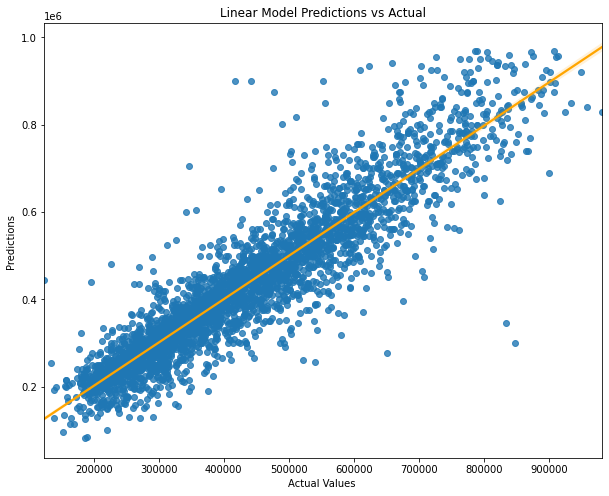

--------------------------------------------------------------------------------------------------------
TAA DAAA!! AND THE WINNER IIIISSSSS:
--------------------------------------------------------------------------------------------------------
Best R2: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 0.849682068572664
Best Mean Absolute Error: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamm

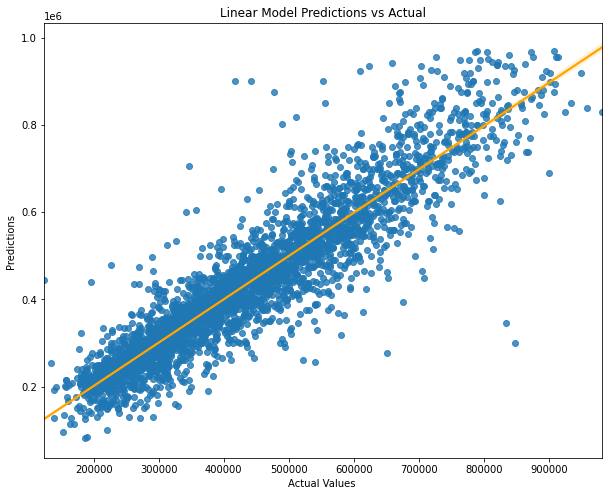

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=

In [117]:
funky_function4_1_3(data9, model_list)

LinearRegression() R2 score: 0.8182859551141711
Mean Absolute Error: 54952.69371325941
Mean Squared Error: 75098.14818168855


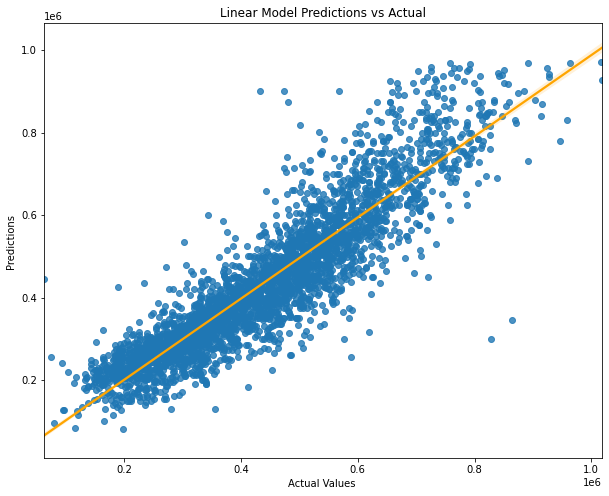

KNeighborsRegressor(n_jobs=10, n_neighbors=3) R2 score: 0.7245251580359096
Mean Absolute Error: 64703.59037990196
Mean Squared Error: 92464.69712908143


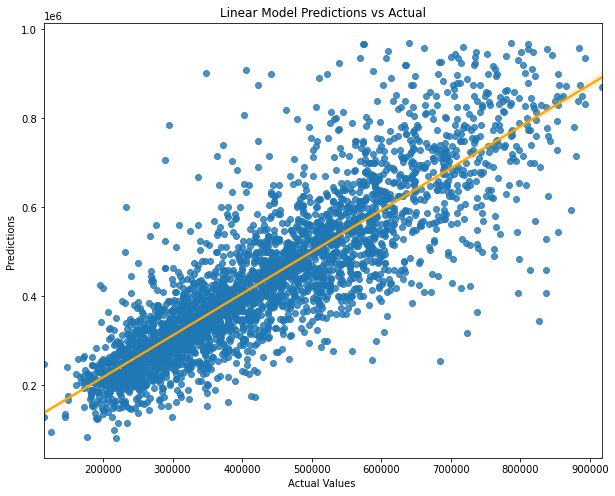

KNeighborsRegressor(n_jobs=10) R2 score: 0.7392814413866184
Mean Absolute Error: 62945.53749999999
Mean Squared Error: 89954.09806113616


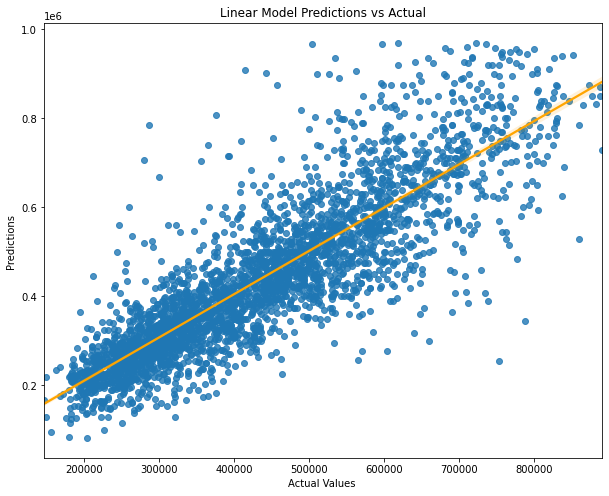

KNeighborsRegressor(n_jobs=10, n_neighbors=7) R2 score: 0.7471169028567417
Mean Absolute Error: 62092.83438375349
Mean Squared Error: 88592.07647656341


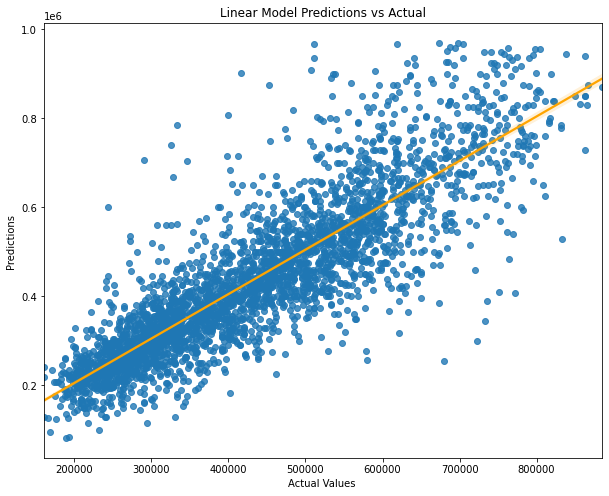

MLPRegressor(random_state=42) R2 score: -3.788699836545929
Mean Absolute Error: 361262.4381481799
Mean Squared Error: 385517.2256847054


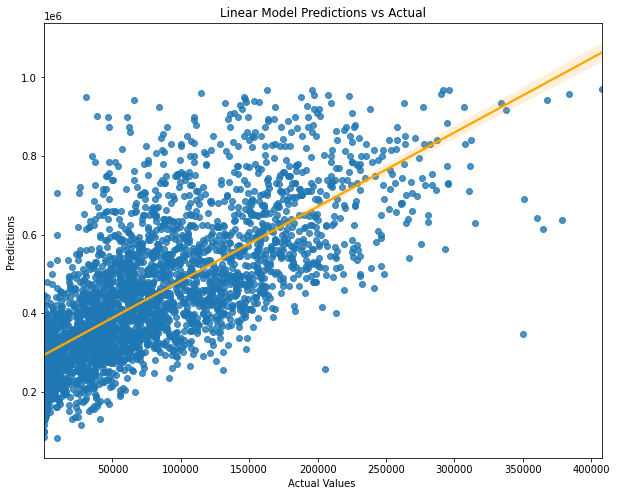

RandomForestRegressor() R2 score: 0.8382537364040308
Mean Absolute Error: 49044.85902267157
Mean Squared Error: 70851.999142633


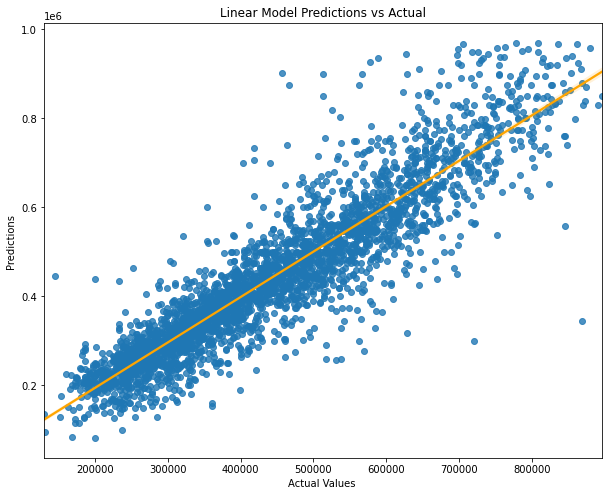

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.8413548867378593
Mean Absolute Error: 48984.155821557135
Mean Squared Error: 70169.49156258661


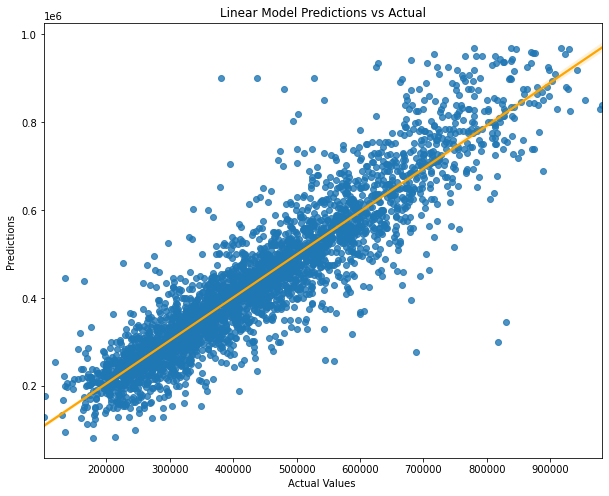

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) R2 score: 0.849682068572664
Mean Absolute Error: 47296.43258128447
Mean Squared Error: 68303.09378908419


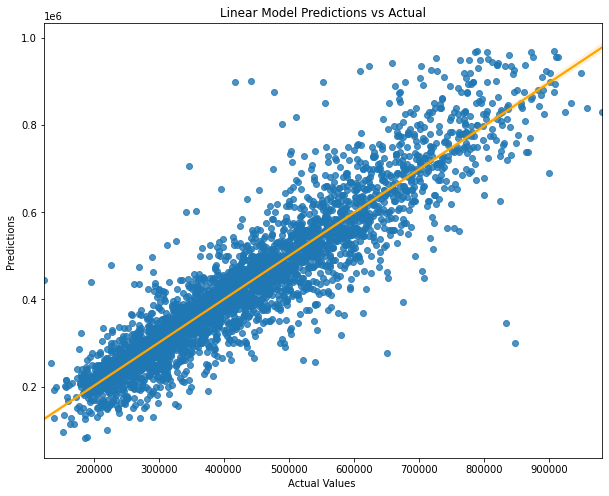

--------------------------------------------------------------------------------------------------------
TAA DAAA!! AND THE WINNER IIIISSSSS:
--------------------------------------------------------------------------------------------------------
Best R2: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) 0.849682068572664
Best Mean Absolute Error: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamm

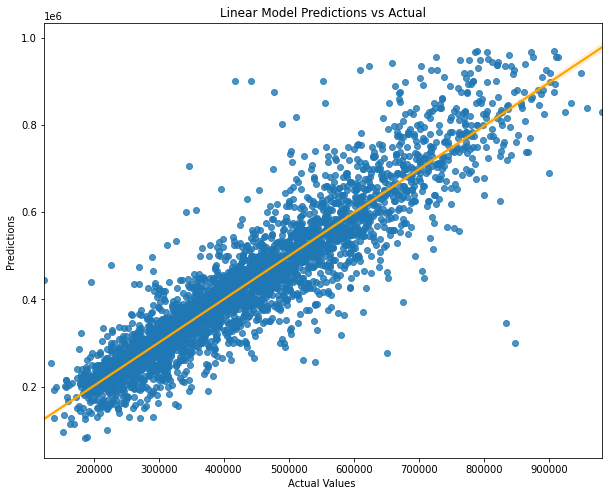

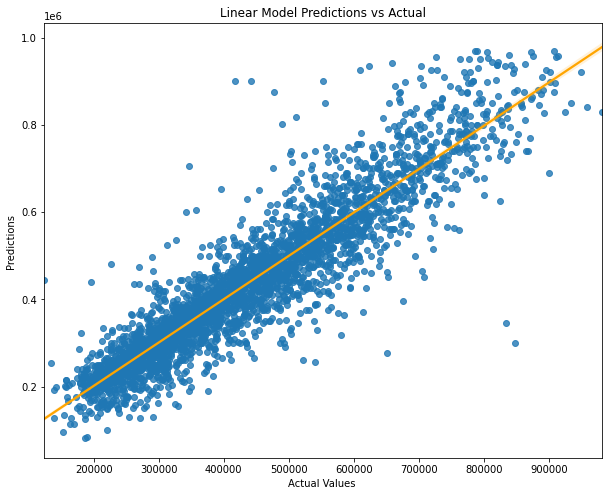

(XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=

In [118]:
funky_function4_1_4(data9, model_list)

### adding StandardScaling() to the model improves it slightly:
R2 score: 0.849682068572664
Mean Absolute Error: 47296.43258128447
Mean Squared Error: 68303.09378908419
    
    VS
    
R2 score: 0.8399801369916342
Mean Absolute Error: 48468.65352714477
Mean Squared Error: 70583.23108228904

In [119]:
#best_model = funky_function(data1, model_list)
#with open('model.pickle', 'wb') as file:
    #pickle.dump(best_model, file)

### More tweaking

In [120]:
data9.columns

Index(['index', 'id', 'data', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zip_code',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15', 'price',
       'was_renovated_or_not', 'basement'],
      dtype='object')

#again, doing any classification model crushes my Python..

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df['data'] = pd.to_datetime(df['data'])
df['data'] = df['data'].dt.month
X = df.drop(['price', 'lon', 'lat'], axis = 1) #independent columns
y = df['price'] #target column i.e price range

y = np.round(df['price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [121]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data9.drop(['price', 'lon', 'lat'], axis = 1) #independent columns
y = data9['price'] #target column i.e price range

y = np.round(data9['price'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

Specs         Score
0                  index  1.061568e+07
1                     id  4.721768e+12
2                   data  3.853332e+03
3               bedrooms  6.261102e+02
4              bathrooms  9.224562e+02
5            sqft_living  1.169916e+06
6               sqft_lot  4.401983e+06
7                 floors  6.993843e+02
8             waterfront  3.496530e+03
9                   view  6.986768e+03
10             condition  3.418907e+02
11                 grade  6.262198e+02
12            sqft_above  1.045056e+06
13         sqft_basement  1.723105e+06
14              yr_built  1.400232e+03
15          yr_renovated  5.671353e+06
16              zip_code  8.358772e+01
17         sqft_living15  7.120606e+05
18            sqft_lot15  3.531993e+06
19  was_renovated_or_not  4.928693e+03
20              basement  1.958211e+03

In [122]:
featureScores.sort_values(ascending=True, by=['Score'])


Specs         Score
16              zip_code  8.358772e+01
10             condition  3.418907e+02
3               bedrooms  6.261102e+02
11                 grade  6.262198e+02
7                 floors  6.993843e+02
4              bathrooms  9.224562e+02
14              yr_built  1.400232e+03
20              basement  1.958211e+03
8             waterfront  3.496530e+03
2                   data  3.853332e+03
19  was_renovated_or_not  4.928693e+03
9                   view  6.986768e+03
17         sqft_living15  7.120606e+05
12            sqft_above  1.045056e+06
5            sqft_living  1.169916e+06
13         sqft_basement  1.723105e+06
18            sqft_lot15  3.531993e+06
6               sqft_lot  4.401983e+06
15          yr_renovated  5.671353e+06
0                  index  1.061568e+07
1                     id  4.721768e+12